### Exerc√≠cio 01

![alt text](ex1.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Atomo:
    def __init__(self, massa: float):
        self.massa = massa

class CadeiaAtomica:
    def __init__(self, N: int, tipo: str = 'homogenea', k: float = 1.0):
        self.N = N
        self.k = k
        self.tipo = tipo.lower()
        self.atom_list = self._criar_cadeia()
        self.massas = [atomo.massa for atomo in self.atom_list]

    def _criar_cadeia(self):
        atomos = []
        m = 1.0
        if self.tipo == 'homogenea':
            for _ in range(self.N):
                atomos.append(Atomo(m))
        elif self.tipo == 'ternaria':
            pattern = [m, 3*m, 5*m]
            for i in range(self.N):
                atomos.append(Atomo(pattern[i % 3]))
        else:
            raise ValueError("Tipo de cadeia inv√°lido. Use 'homogenea' ou 'ternaria'.")
        return atomos

    def montar_matrizes(self):
        M = np.diag(self.massas)
        K = np.zeros((self.N, self.N))
        for i in range(self.N):
            K[i, i] += 2 * self.k
            K[i, (i - 1) % self.N] -= self.k
            K[i, (i + 1) % self.N] -= self.k
        return M, K

    def calcular_frequencias_e_modos(self):
        M, K = self.montar_matrizes()
        A = np.linalg.inv(M) @ K
        eigvals, eigvecs = np.linalg.eig(A)

        idx = np.argsort(np.real(eigvals))
        eigvals = np.real(eigvals[idx])
        eigvecs = np.real(eigvecs[:, idx])
        freq = np.sqrt(np.abs(eigvals))

        return freq, eigvecs

    def plotar_frequencias(self, freq):
        plt.figure(figsize=(8, 4))
        plt.plot(range(1, len(freq)+1), freq, marker='o')
        plt.title(f"Frequ√™ncias Naturais - {self.tipo.capitalize()} (N={self.N})")
        plt.xlabel("Modo")
        plt.ylabel("Frequ√™ncia (rad/s)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plotar_modos_normais(self, modos, freq, n_modos=3):
        plt.figure(figsize=(10, 6))
        for i in range(n_modos):
            desloc = modos[:, i]
            desloc = desloc / np.max(np.abs(desloc))  # Normalizar
            plt.subplot(n_modos, 1, i+1)
            plt.plot(range(self.N), desloc, marker='o')
            plt.title(f"Modo {i+1} - Freq: {freq[i]:.2f} rad/s")
            plt.xlabel("√çndice do √Åtomo")
            plt.ylabel("Deslocamento")
            plt.grid(True)
        plt.tight_layout()
        plt.show()



===== N = 100, Tipo = homogenea =====
Primeiras 5 frequ√™ncias: [6.32464637e-08 6.28215182e-02 6.28215182e-02 1.25581039e-01
 1.25581039e-01]


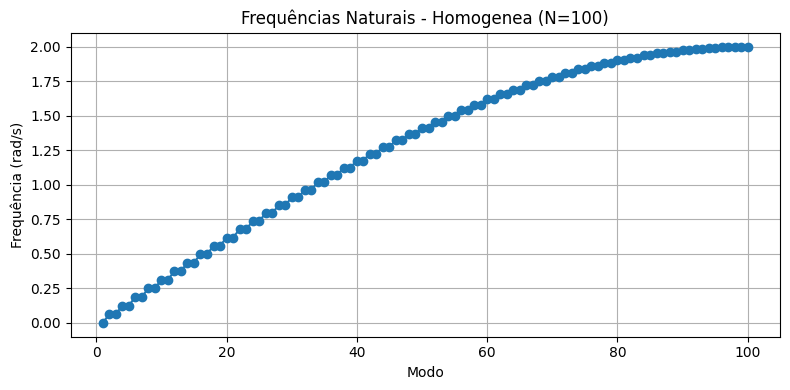

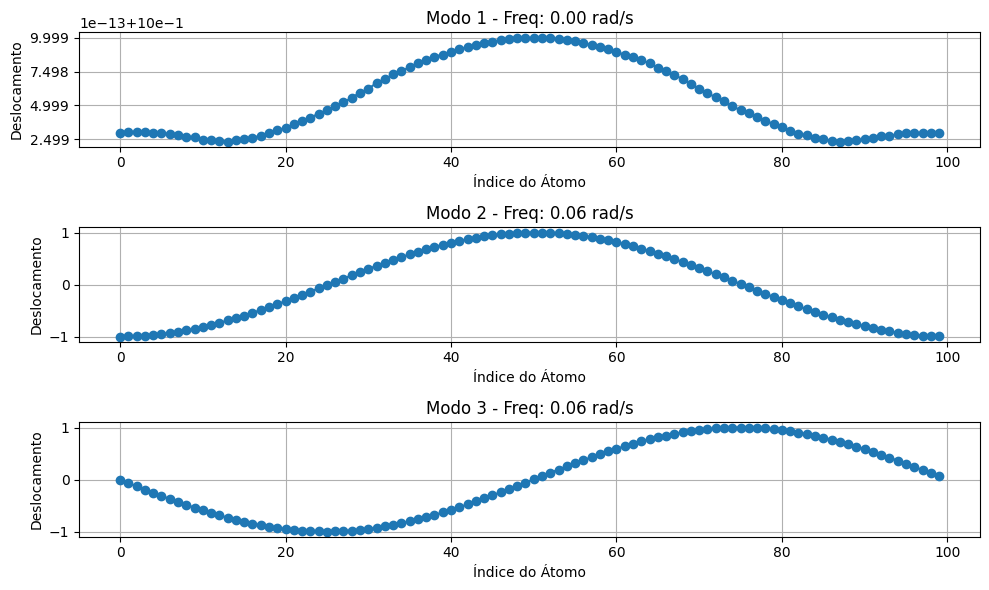


===== N = 100, Tipo = ternaria =====
Primeiras 5 frequ√™ncias: [5.47868943e-09 3.62625078e-02 3.65063707e-02 7.24437566e-02
 7.29338994e-02]


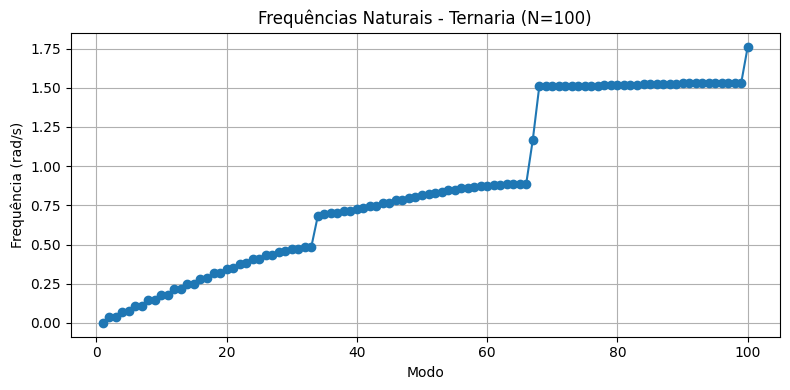

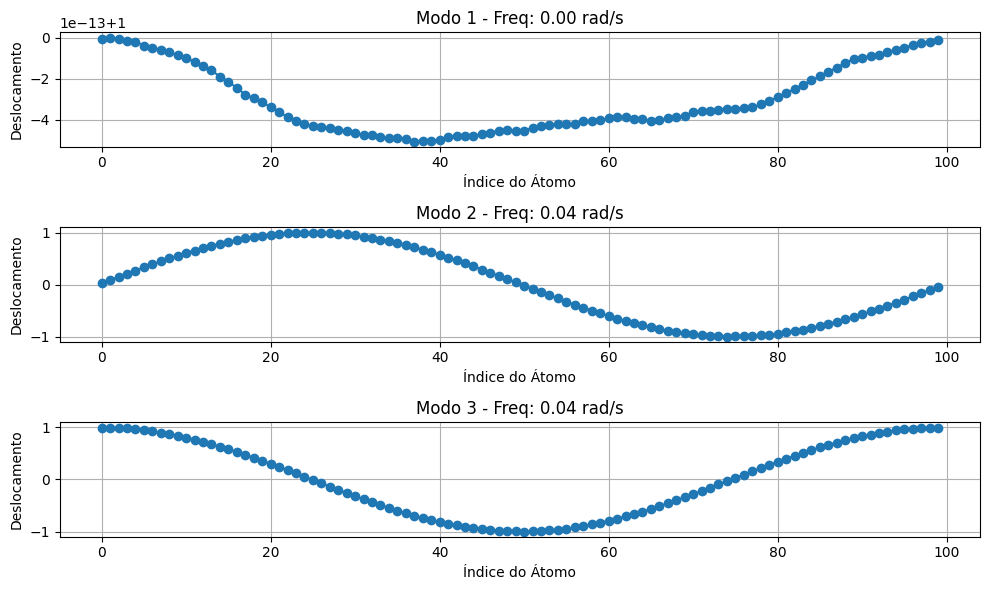


===== N = 1000, Tipo = homogenea =====
Primeiras 5 frequ√™ncias: [1.31415234e-07 6.28317497e-03 6.28317497e-03 1.25662879e-02
 1.25662879e-02]

===== N = 1000, Tipo = ternaria =====
Primeiras 5 frequ√™ncias: [4.83929436e-09 3.62758565e-03 3.63000570e-03 7.25509280e-03
 7.25993314e-03]

===== N = 10000, Tipo = homogenea =====
Primeiras 5 frequ√™ncias: [0.         0.00062832 0.00062832 0.00125664 0.00125664]

===== N = 10000, Tipo = ternaria =====
Primeiras 5 frequ√™ncias: [0.         0.00036276 0.00036278 0.00072552 0.00072557]


In [2]:
# Exemplo de uso
from frequencia import CadeiaAtomica


Ns = [100, 1000, 10000]
tipos = ['homogenea', 'ternaria']
k = 1.0

for N in Ns:
    for tipo in tipos:
        print(f"\n===== N = {N}, Tipo = {tipo} =====")
        sistema = CadeiaAtomica(N=N, tipo=tipo, k=k)
        freq, modos = sistema.calcular_frequencias_e_modos()
        print("Primeiras 5 frequ√™ncias:", freq[:5])

        if N == 100:
            sistema.plotar_frequencias(freq)
            sistema.plotar_modos_normais(modos, freq, n_modos=3)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh  # Mais eficiente para problemas sim√©tricos generalizados

# Classe que representa a cadeia at√¥mica
class CadeiaAtomica:
    def __init__(self, N: int, tipo: str = 'homogenea', k: float = 1.0):
        self.N = N               # N√∫mero de √°tomos na cadeia
        self.k = k               # Constante el√°stica das molas
        self.tipo = tipo.lower()  # Tipo da cadeia ('homogenea' ou 'ternaria')
        self.massas = self._gerar_massas()  # Vetor com as massas dos √°tomos

    def _gerar_massas(self):
        m = 1.0  # Massa base
        if self.tipo == 'homogenea':
            return np.full(self.N, m)
        elif self.tipo == 'ternaria':
            # Altern√¢ncia m, 3m, 5m, m, 3m, 5m, ...
            pattern = [m, 3*m, 5*m]
            return np.array([pattern[i % 3] for i in range(self.N)])
        else:
            raise ValueError("Tipo inv√°lido. Use 'homogenea' ou 'ternaria'.")

    def montar_matrizes(self):
        # Matriz de massa (diagonal)
        M = np.diag(self.massas)

        # Matriz de rigidez K com condi√ß√µes de contorno peri√≥dicas (circular)
        K = np.zeros((self.N, self.N))
        for i in range(self.N):
            K[i, i] = 2 * self.k
            K[i, (i + 1) % self.N] = -self.k
            K[i, (i - 1) % self.N] = -self.k

        return M, K

    def calcular_frequencias_e_modos(self):
        M, K = self.montar_matrizes()

        # Resolve o problema generalizado: K x = Œª M x
        eigvals, eigvecs = eigh(K, M)

        # Remove valores negativos e ordena
        eigvals = np.clip(eigvals, 0, None)
        freq = np.sqrt(eigvals)

        return freq, eigvecs

    def plotar_frequencias(self, freq):
        plt.figure(figsize=(8, 4))
        plt.plot(freq, '.', markersize=4)
        plt.title(f"Frequ√™ncias Naturais - {self.tipo.capitalize()} (N={self.N})")
        plt.xlabel("Modo")
        plt.ylabel("Frequ√™ncia (rad/s)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plotar_modos_normais(self, modos, freq, n_modos=3):
        plt.figure(figsize=(10, 6))
        for i in range(n_modos):
            desloc = modos[:, i]
            desloc /= np.max(np.abs(desloc))  # Normaliza o deslocamento
            plt.subplot(n_modos, 1, i + 1)
            plt.plot(desloc, marker='o')
            plt.title(f"Modo {i + 1} - Freq: {freq[i]:.4f} rad/s")
            plt.xlabel("√çndice do √Åtomo")
            plt.ylabel("Deslocamento")
            plt.grid(True)
        plt.tight_layout()
        plt.show()



===== N = 100, Tipo = homogenea =====
Primeiras 5 frequ√™ncias: [0.         0.06282152 0.06282152 0.12558104 0.12558104]


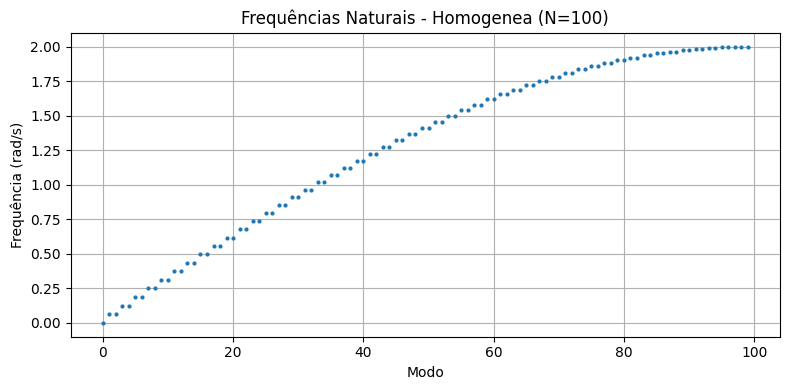

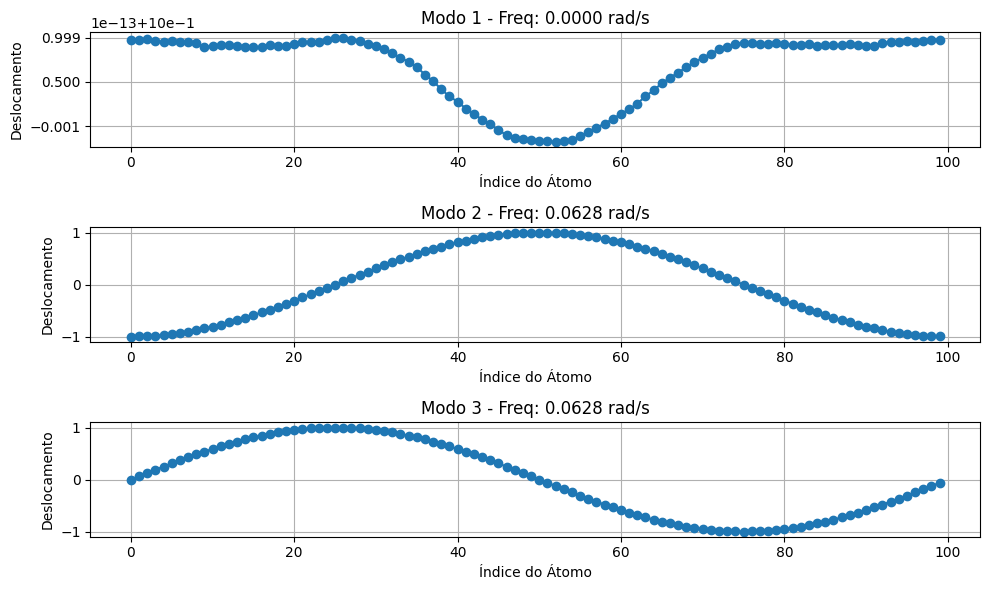


===== N = 100, Tipo = ternaria =====
Primeiras 5 frequ√™ncias: [0.         0.03626251 0.03650637 0.07244376 0.0729339 ]


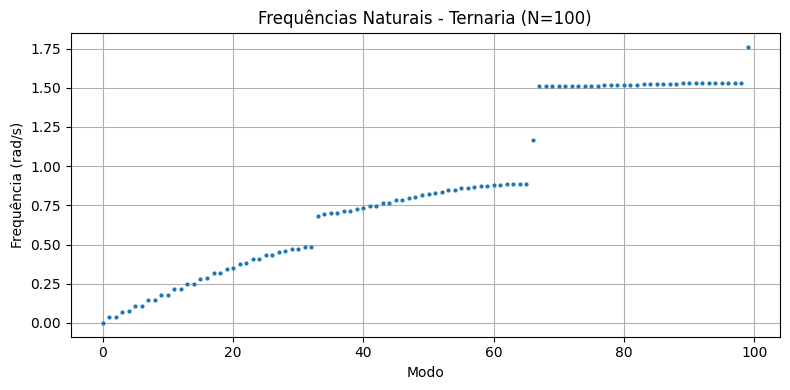

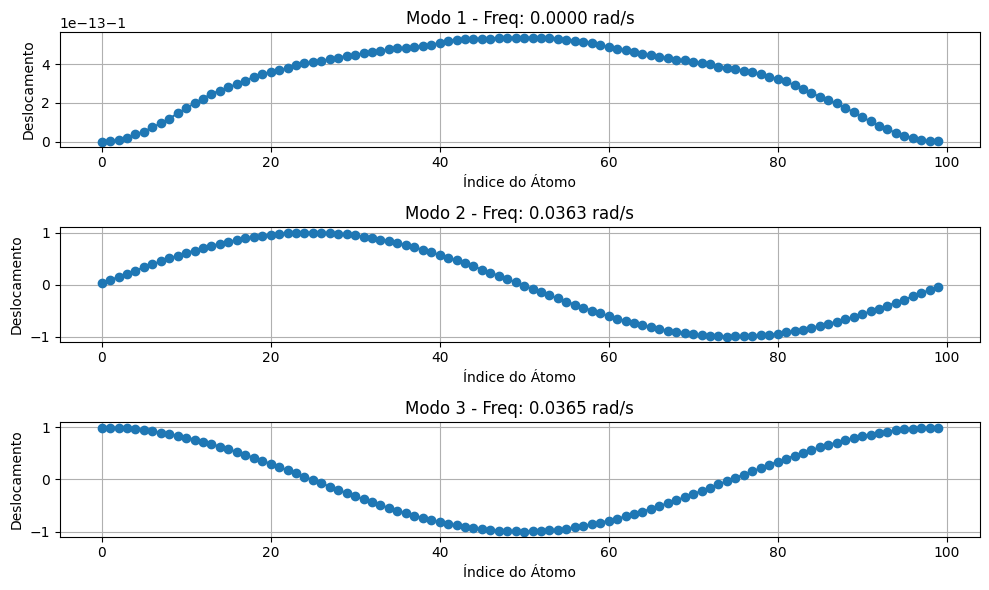


===== N = 1000, Tipo = homogenea =====
Primeiras 5 frequ√™ncias: [2.52890835e-08 6.28317497e-03 6.28317497e-03 1.25662879e-02
 1.25662879e-02]


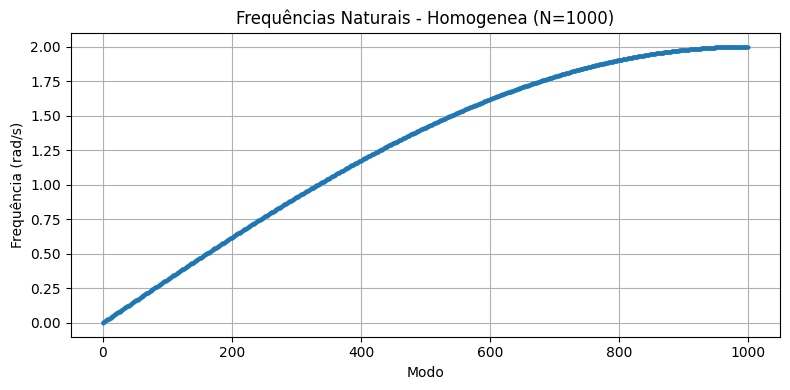

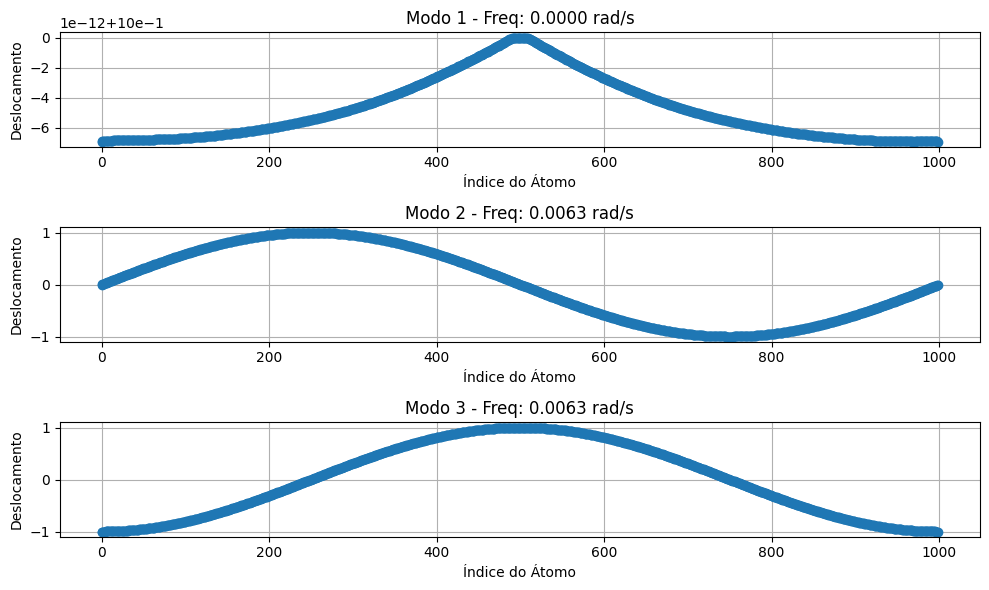


===== N = 1000, Tipo = ternaria =====
Primeiras 5 frequ√™ncias: [0.         0.00362759 0.00363001 0.00725509 0.00725993]


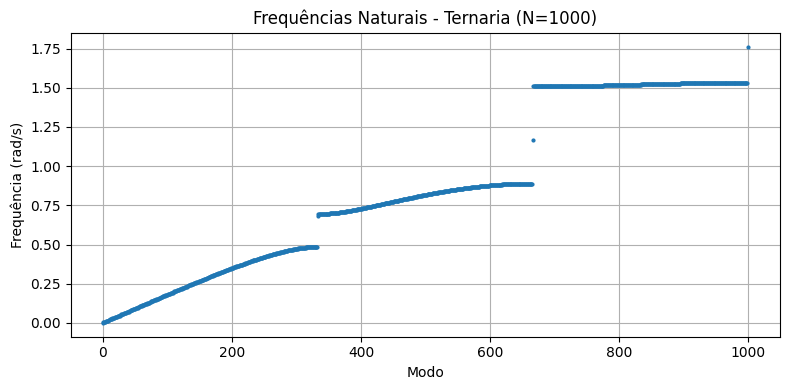

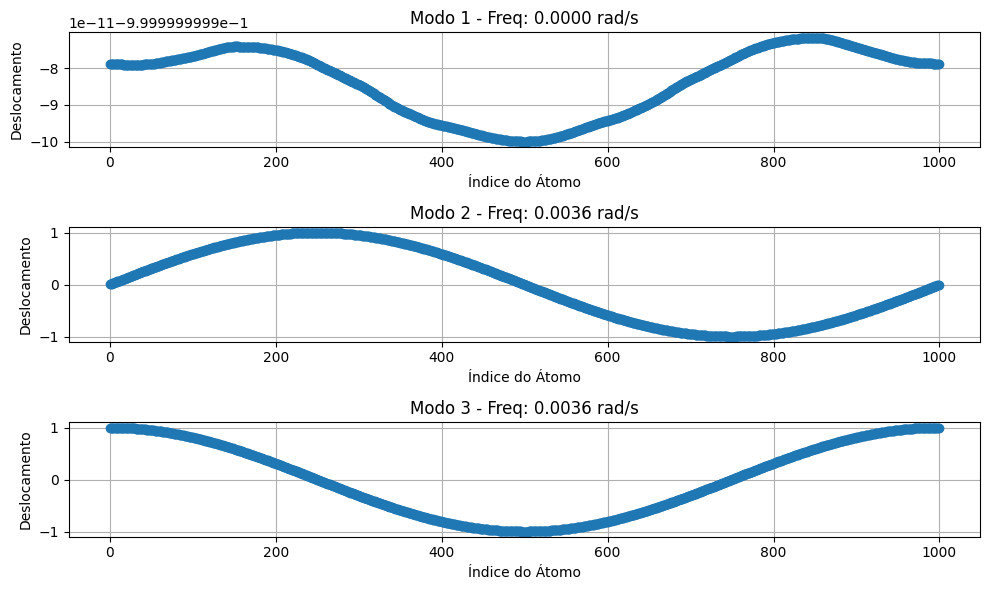


===== N = 10000, Tipo = homogenea =====
Primeiras 5 frequ√™ncias: [1.41134000e-08 6.28318520e-04 6.28318521e-04 1.25663698e-03
 1.25663698e-03]


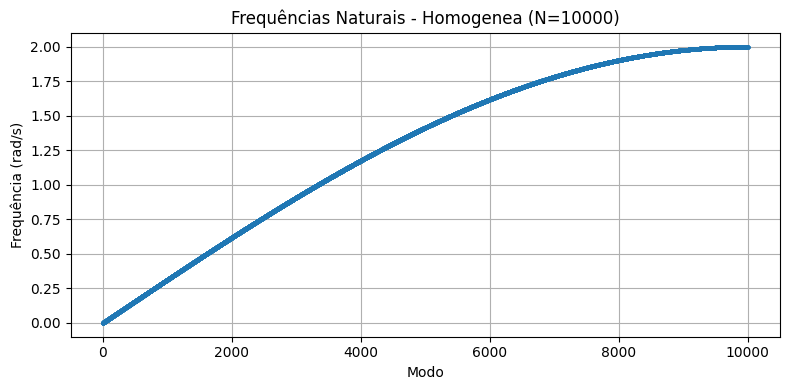

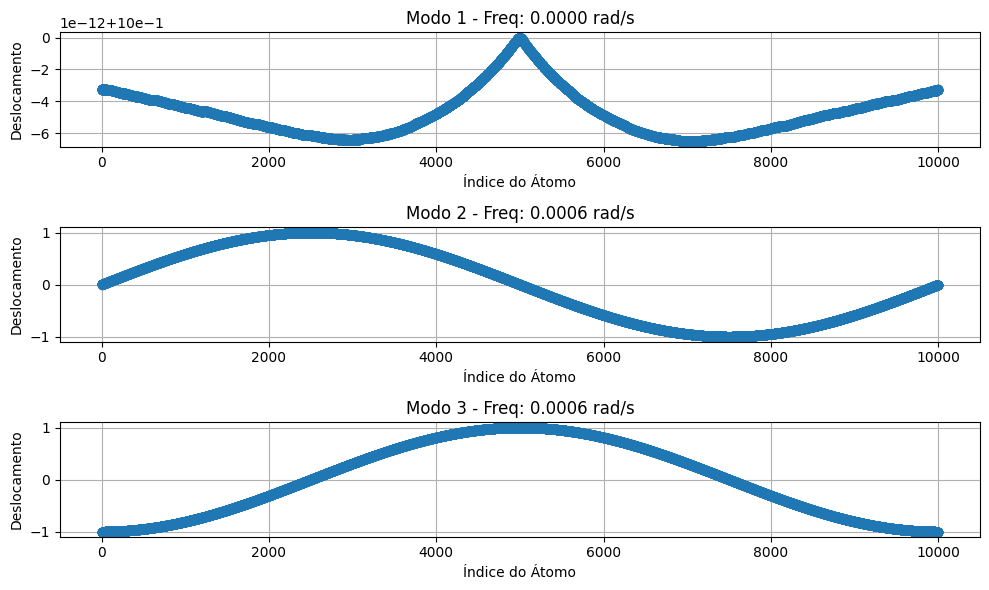


===== N = 10000, Tipo = ternaria =====
Primeiras 5 frequ√™ncias: [0.         0.00036276 0.00036278 0.00072552 0.00072557]


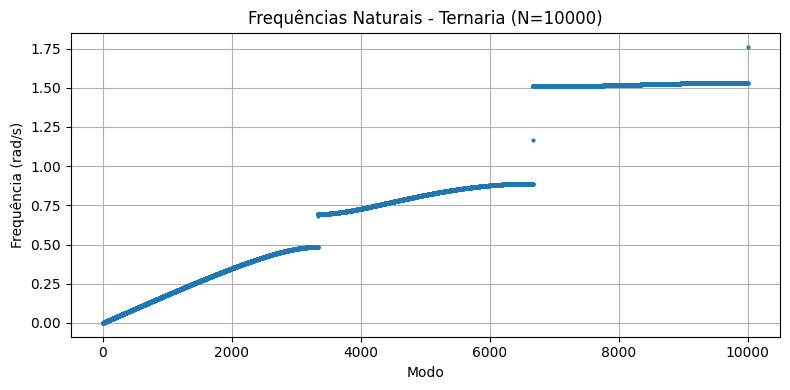

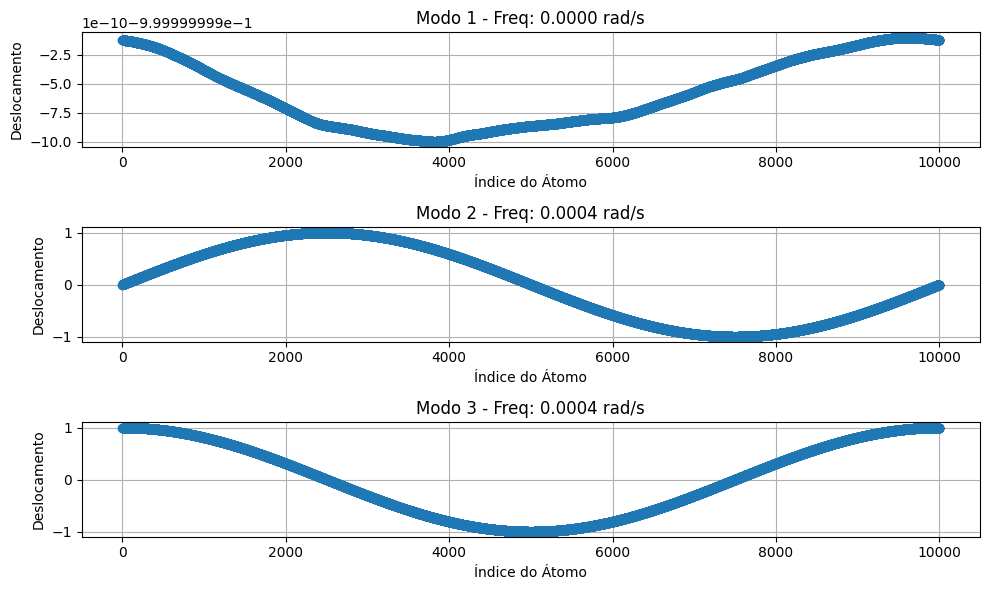

In [7]:
Ns = [100, 1000, 10000]
tipos = ['homogenea', 'ternaria']

for N in Ns:
    for tipo in tipos:
        print(f"\n===== N = {N}, Tipo = {tipo} =====")
        sistema = CadeiaAtomica(N=N, tipo=tipo, k=1.0)
        freq, modos = sistema.calcular_frequencias_e_modos()
        print("Primeiras 5 frequ√™ncias:", freq[:5])

        # Plota todas as frequ√™ncias
        sistema.plotar_frequencias(freq)

        # Plota os 3 primeiros modos completos SEM corte
        sistema.plotar_modos_normais(modos, freq, n_modos=3)

### Exerc√≠cio 02
![alt text](ex2.png)

In [8]:
def plotar_densidade_de_estados(freq_hom, freq_tern, N, bins=100):
    plt.figure(figsize=(10, 5))

    # Histograma normalizado da homog√™nea
    plt.hist(freq_hom, bins=bins, alpha=0.6, density=True, label='Homog√™nea', color='blue')

    # Histograma normalizado da tern√°ria
    plt.hist(freq_tern, bins=bins, alpha=0.6, density=True, label='Tern√°ria', color='orange')

    plt.title(f"Densidade de Estados - N = {N}")
    plt.xlabel("Frequ√™ncia (rad/s)")
    plt.ylabel("Densidade")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


===== N = 100 =====
Homog√™nea - Primeiras 5 frequ√™ncias: [0.         0.06282152 0.06282152 0.12558104 0.12558104]
Tern√°ria - Primeiras 5 frequ√™ncias: [0.         0.03626251 0.03650637 0.07244376 0.0729339 ]


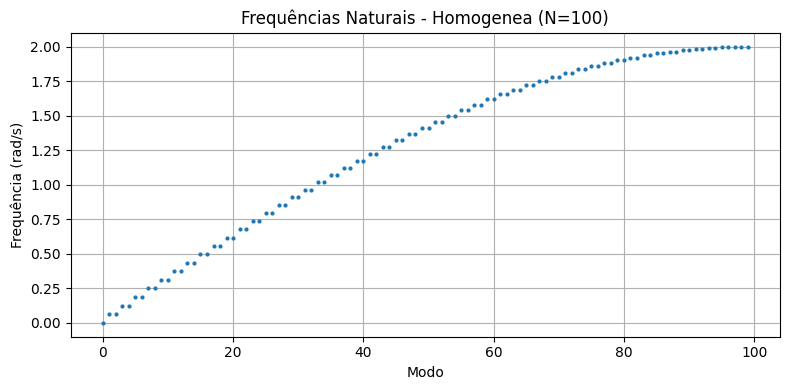

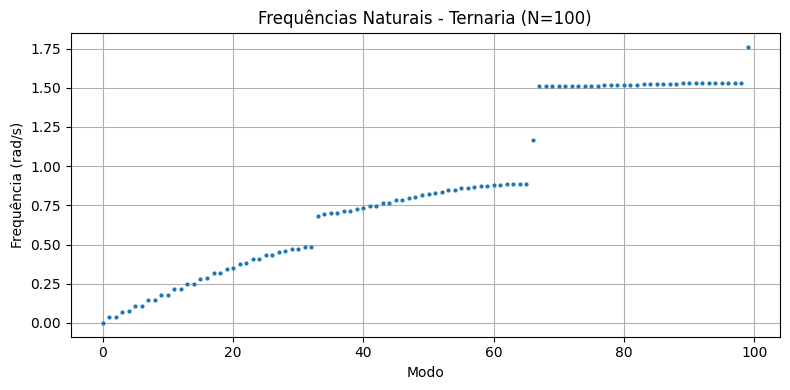

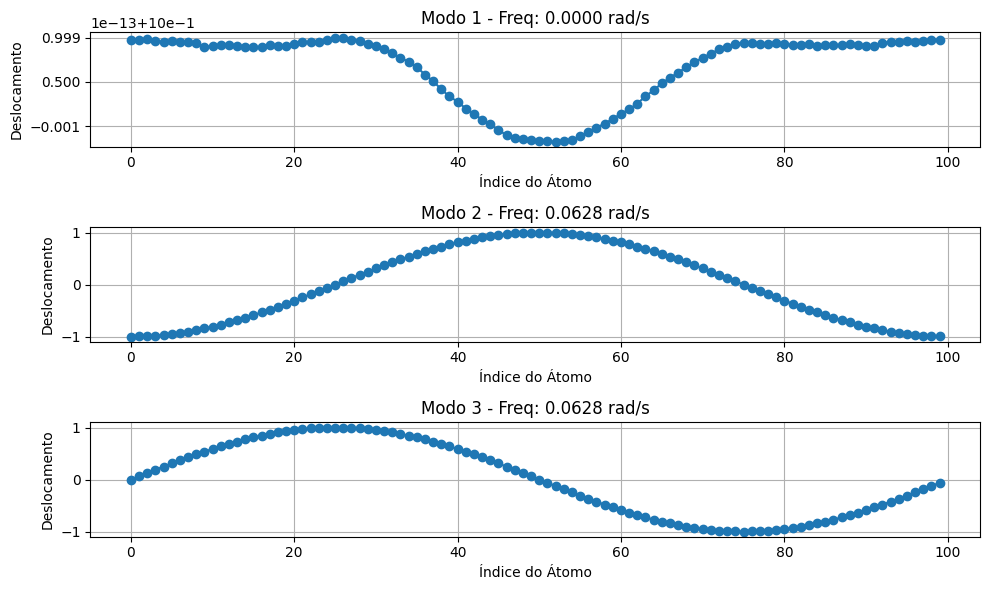

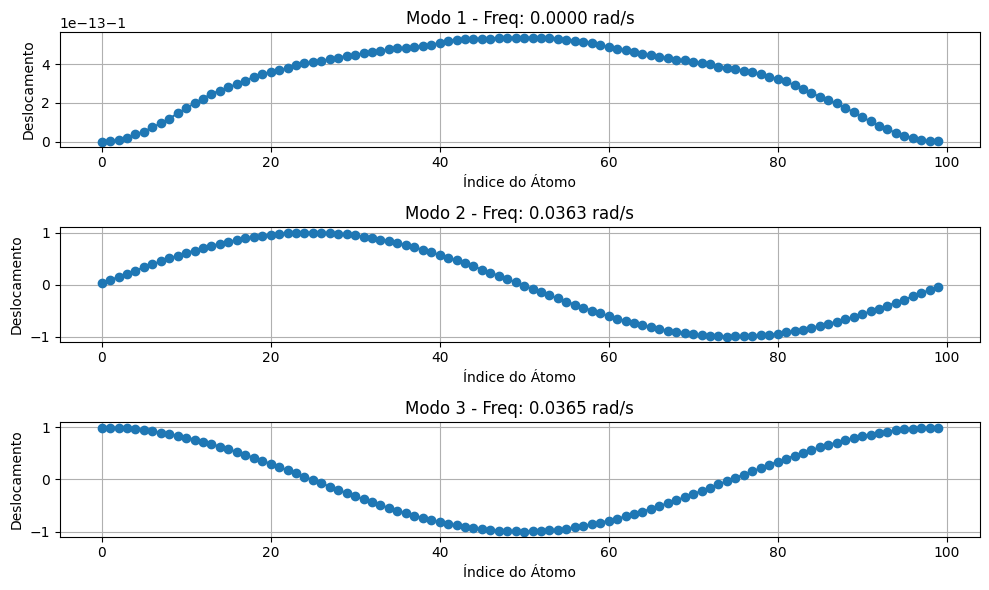

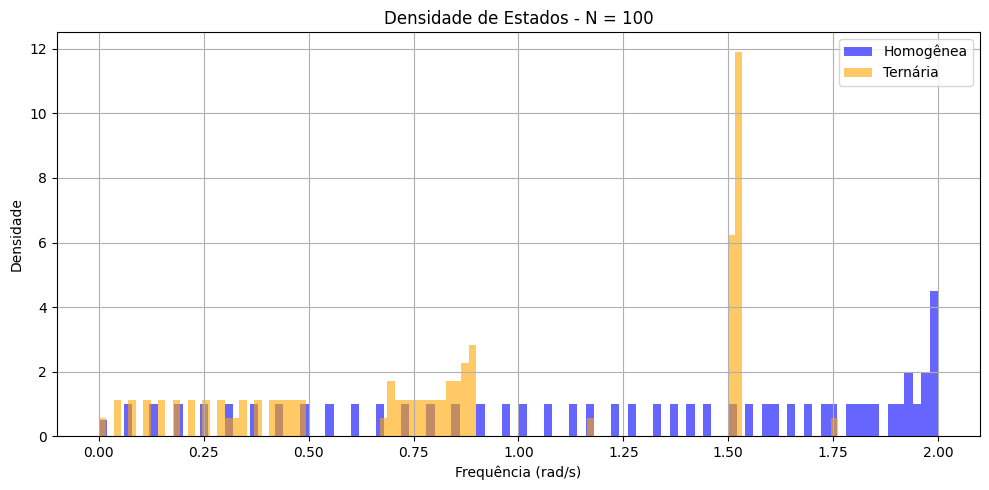


===== N = 1000 =====
Homog√™nea - Primeiras 5 frequ√™ncias: [2.52890835e-08 6.28317497e-03 6.28317497e-03 1.25662879e-02
 1.25662879e-02]
Tern√°ria - Primeiras 5 frequ√™ncias: [0.         0.00362759 0.00363001 0.00725509 0.00725993]


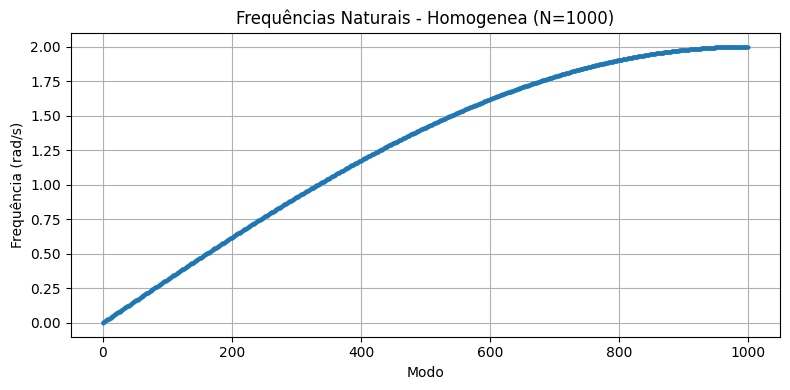

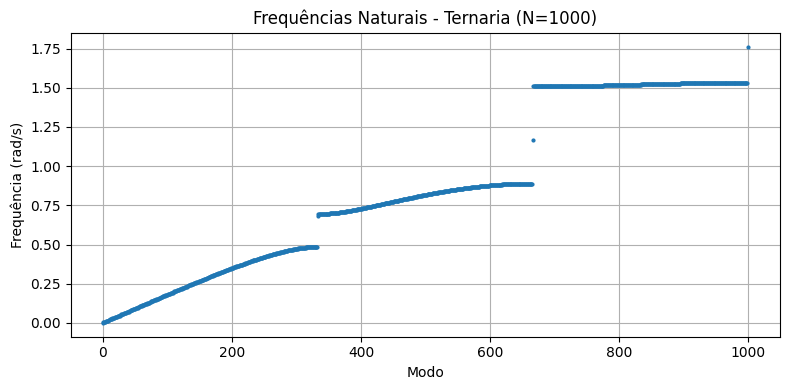

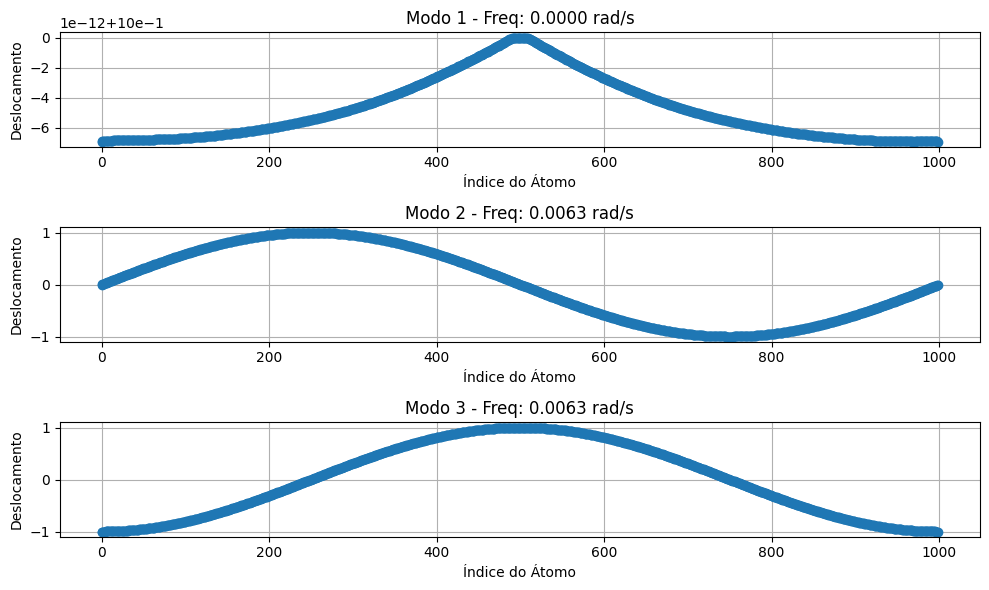

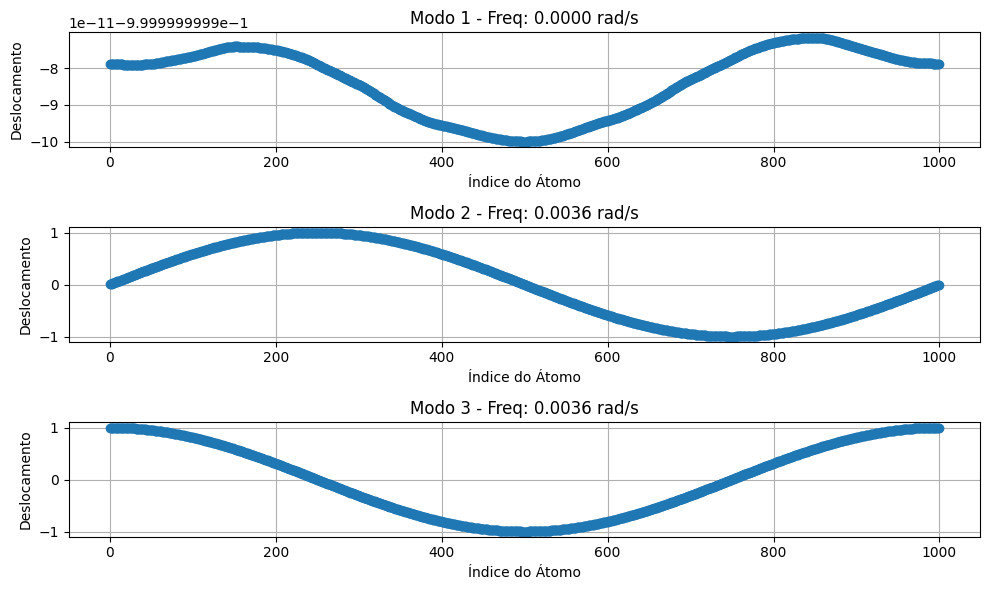

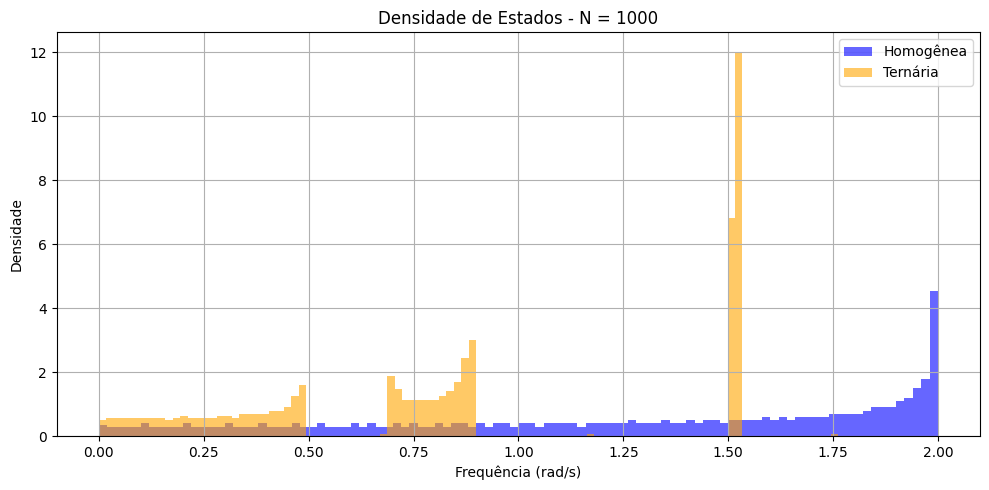


===== N = 10000 =====
Homog√™nea - Primeiras 5 frequ√™ncias: [1.41134000e-08 6.28318520e-04 6.28318521e-04 1.25663698e-03
 1.25663698e-03]
Tern√°ria - Primeiras 5 frequ√™ncias: [0.         0.00036276 0.00036278 0.00072552 0.00072557]


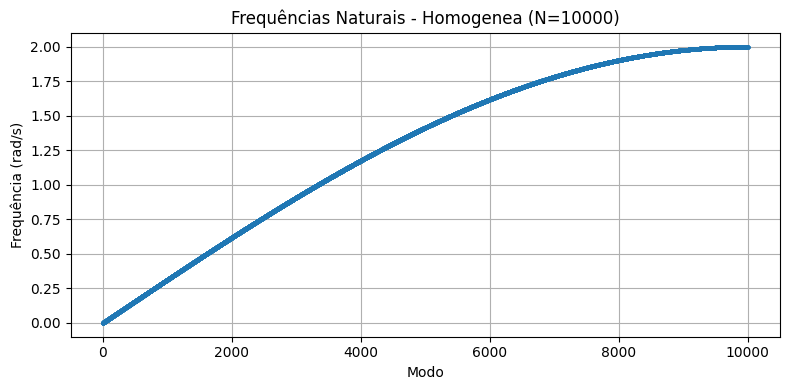

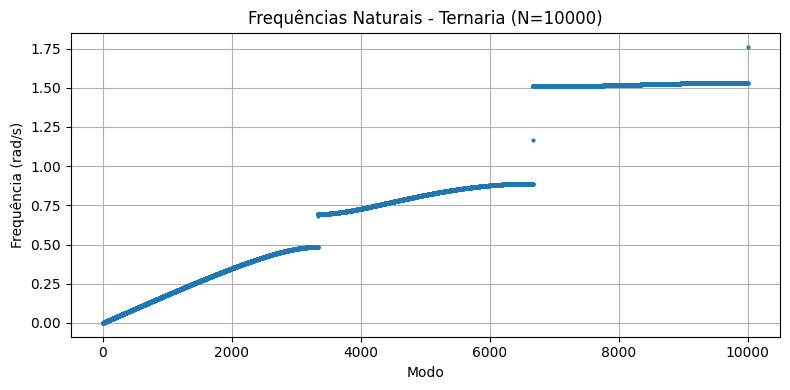

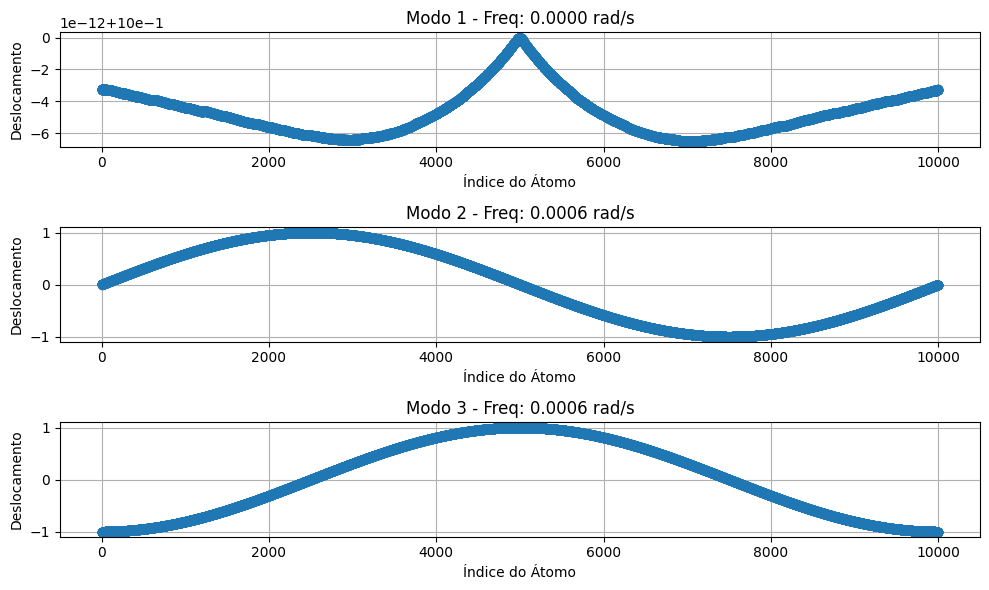

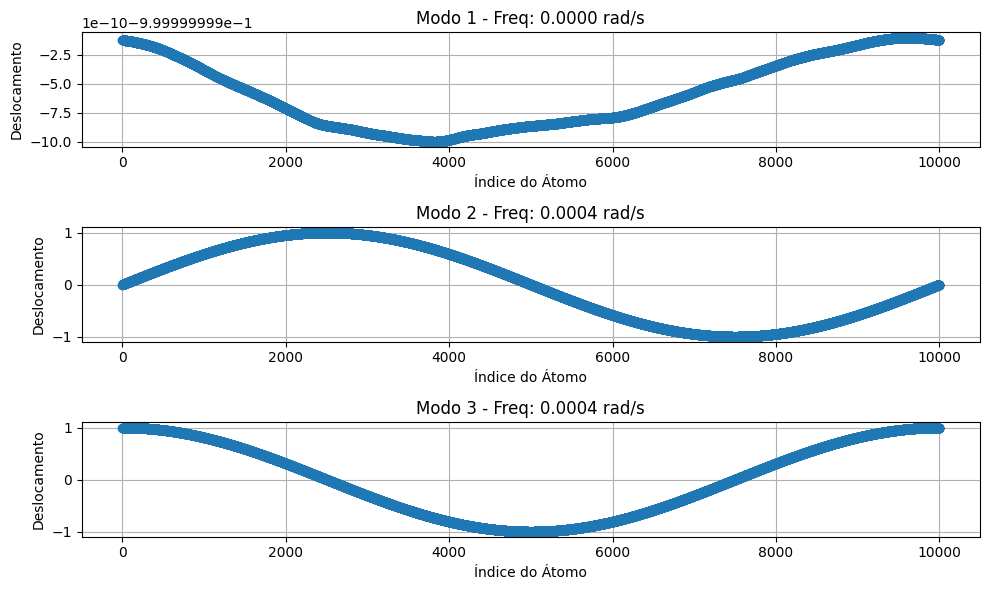

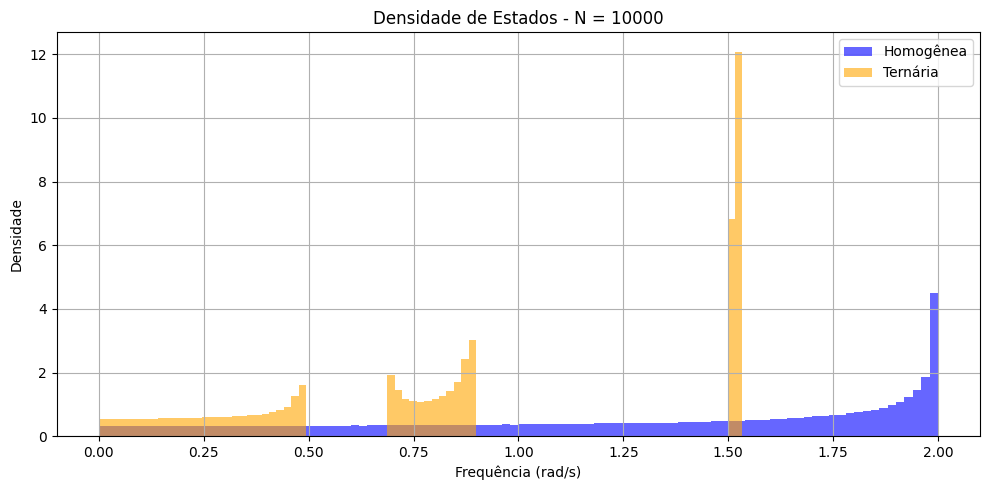

In [9]:
Ns = [100, 1000, 10000]

for N in Ns:
    print(f"\n===== N = {N} =====")

    # Homog√™nea
    sistema_hom = CadeiaAtomica(N=N, tipo='homogenea', k=1.0)
    freq_hom, modos_hom = sistema_hom.calcular_frequencias_e_modos()
    print("Homog√™nea - Primeiras 5 frequ√™ncias:", freq_hom[:5])

    # Tern√°ria
    sistema_tern = CadeiaAtomica(N=N, tipo='ternaria', k=1.0)
    freq_tern, modos_tern = sistema_tern.calcular_frequencias_e_modos()
    print("Tern√°ria - Primeiras 5 frequ√™ncias:", freq_tern[:5])

    # Plota frequ√™ncias individuais
    sistema_hom.plotar_frequencias(freq_hom)
    sistema_tern.plotar_frequencias(freq_tern)

    # Plota os primeiros 3 modos normais
    sistema_hom.plotar_modos_normais(modos_hom, freq_hom)
    sistema_tern.plotar_modos_normais(modos_tern, freq_tern)

    # Plota compara√ß√£o da densidade de estados
    plotar_densidade_de_estados(freq_hom, freq_tern, N, bins=100)


### Exerc√≠cio 03
![alt text](ex3.png)

In [10]:
def plotar_modos_extremos(modos, freq, N, tipo, n_modos=5):
    plt.figure(figsize=(14, 10))

    # √çndices das 5 menores e 5 maiores frequ√™ncias
    indices_menores = np.argsort(freq)[:n_modos]
    indices_maiores = np.argsort(freq)[-n_modos:]

    # Plot dos modos de menor frequ√™ncia
    for i, idx in enumerate(indices_menores):
        desloc = modos[:, idx]
        desloc /= np.max(np.abs(desloc))
        plt.subplot(2, n_modos, i + 1)
        plt.plot(desloc, marker='.')
        plt.title(f"Menor Modo {i+1} - Freq: {freq[idx]:.4f} rad/s")
        plt.xlabel("√Åtomo")
        plt.ylabel("Desloc.")
        plt.grid(True)

    # Plot dos modos de maior frequ√™ncia
    for i, idx in enumerate(indices_maiores):
        desloc = modos[:, idx]
        desloc /= np.max(np.abs(desloc))
        plt.subplot(2, n_modos, n_modos + i + 1)
        plt.plot(desloc, marker='.')
        plt.title(f"Maior Modo {i+1} - Freq: {freq[idx]:.4f} rad/s")
        plt.xlabel("√Åtomo")
        plt.ylabel("Desloc.")
        plt.grid(True)

    plt.suptitle(f"Modos Normais Extremos - {tipo.capitalize()} (N={N})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



===== N = 100 =====
Homog√™nea - Primeiras 5 frequ√™ncias: [0.         0.06282152 0.06282152 0.12558104 0.12558104]
Tern√°ria - Primeiras 5 frequ√™ncias: [0.         0.03626251 0.03650637 0.07244376 0.0729339 ]


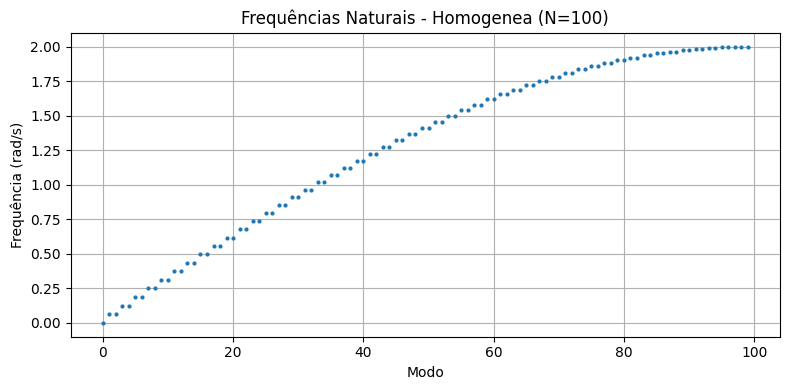

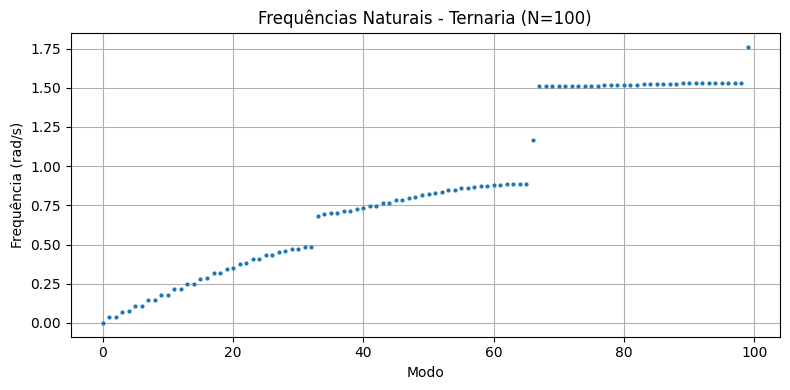

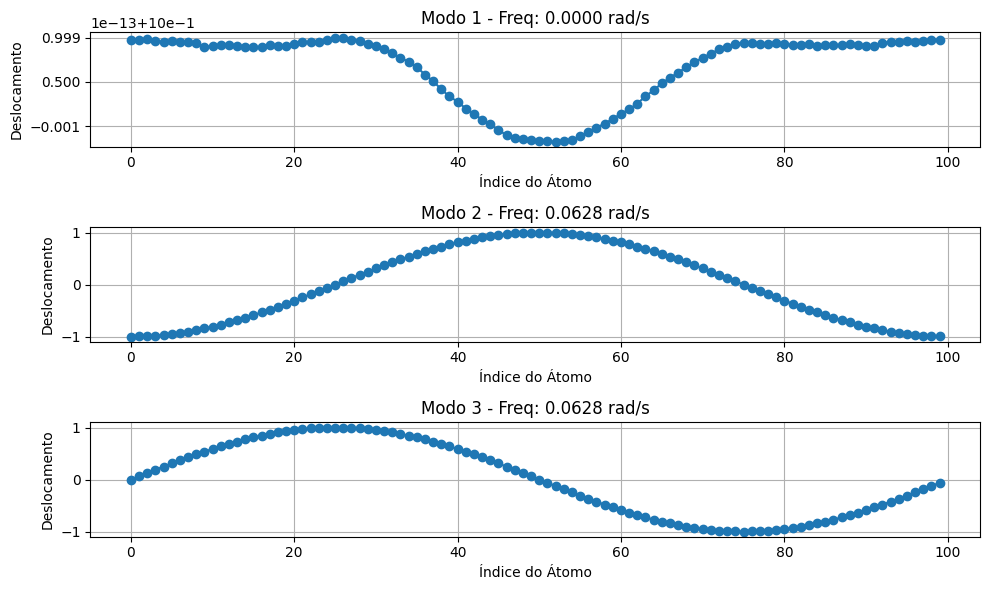

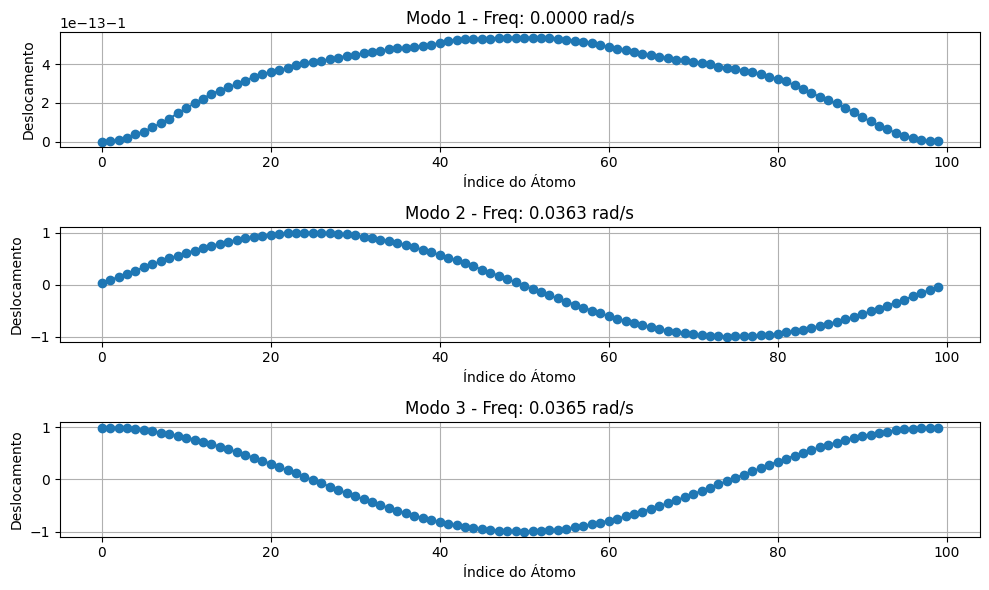

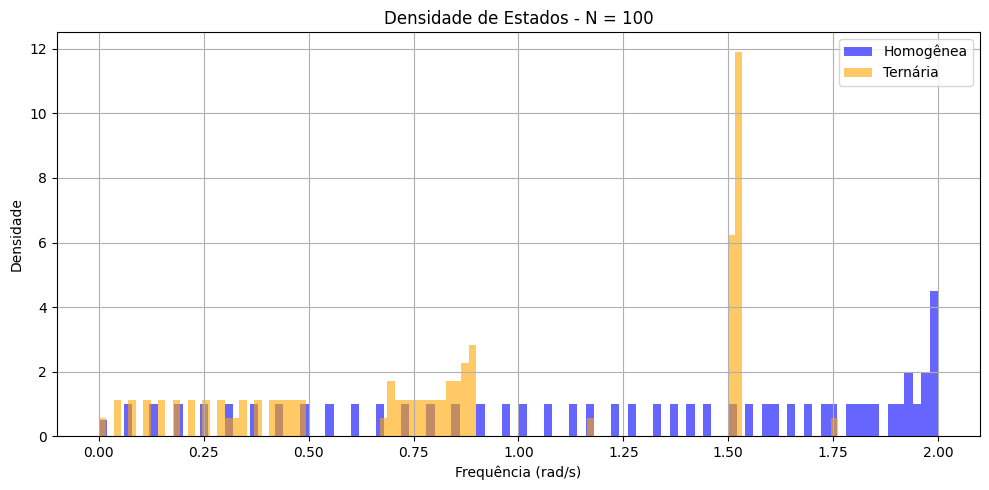

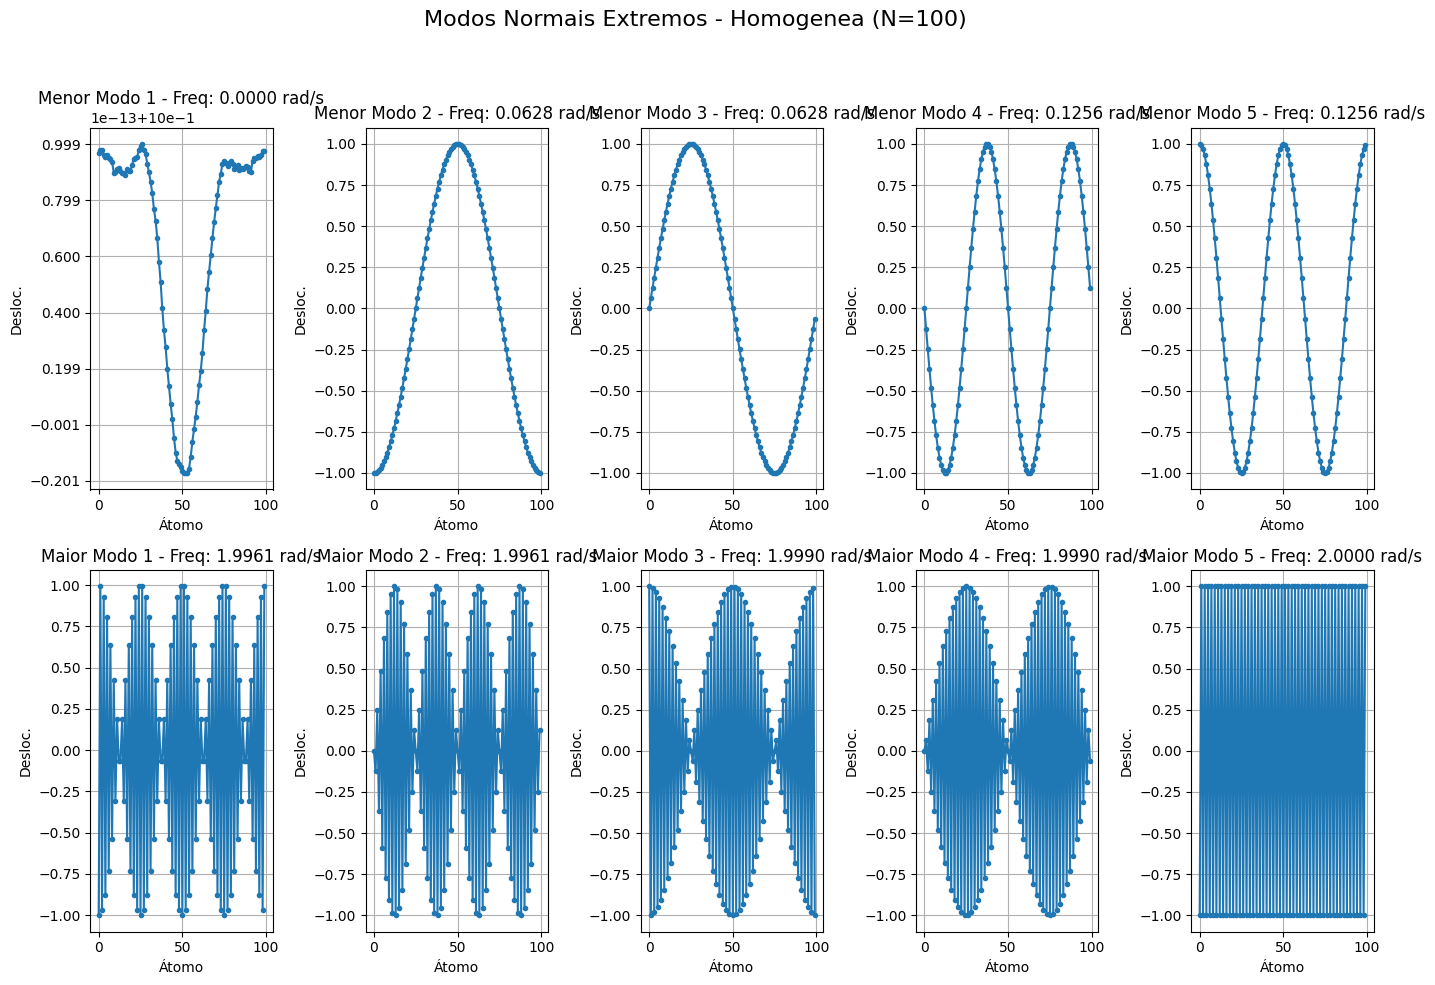

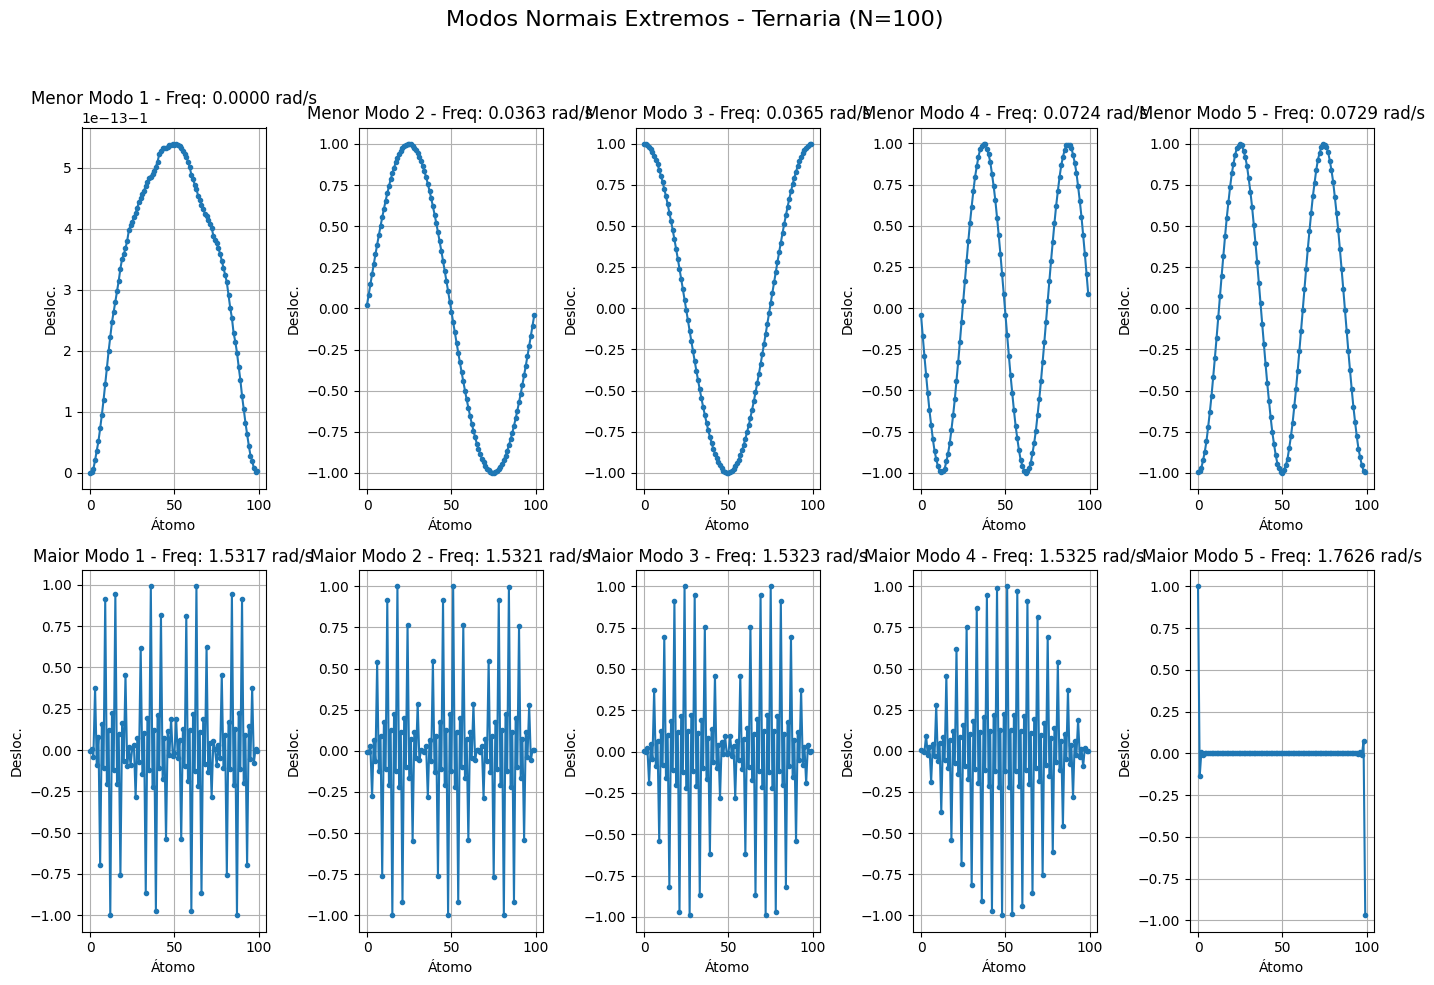


===== N = 1000 =====
Homog√™nea - Primeiras 5 frequ√™ncias: [2.52890835e-08 6.28317497e-03 6.28317497e-03 1.25662879e-02
 1.25662879e-02]
Tern√°ria - Primeiras 5 frequ√™ncias: [0.         0.00362759 0.00363001 0.00725509 0.00725993]


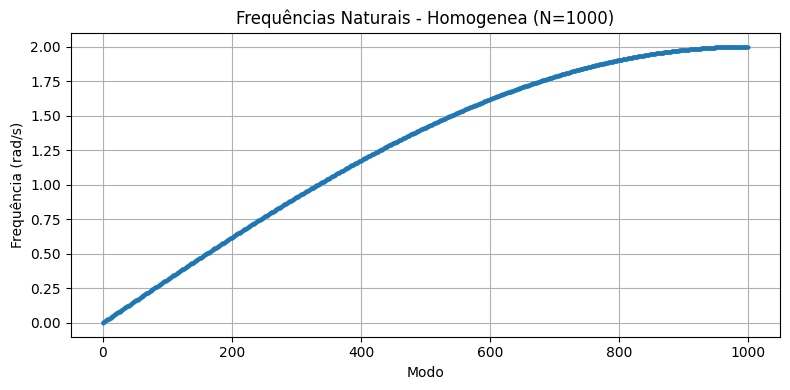

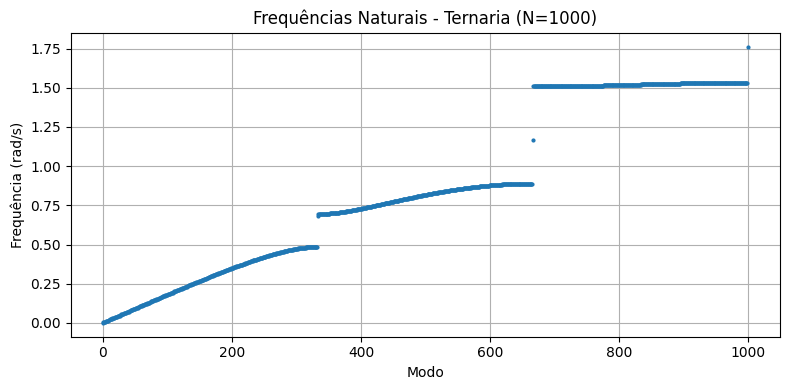

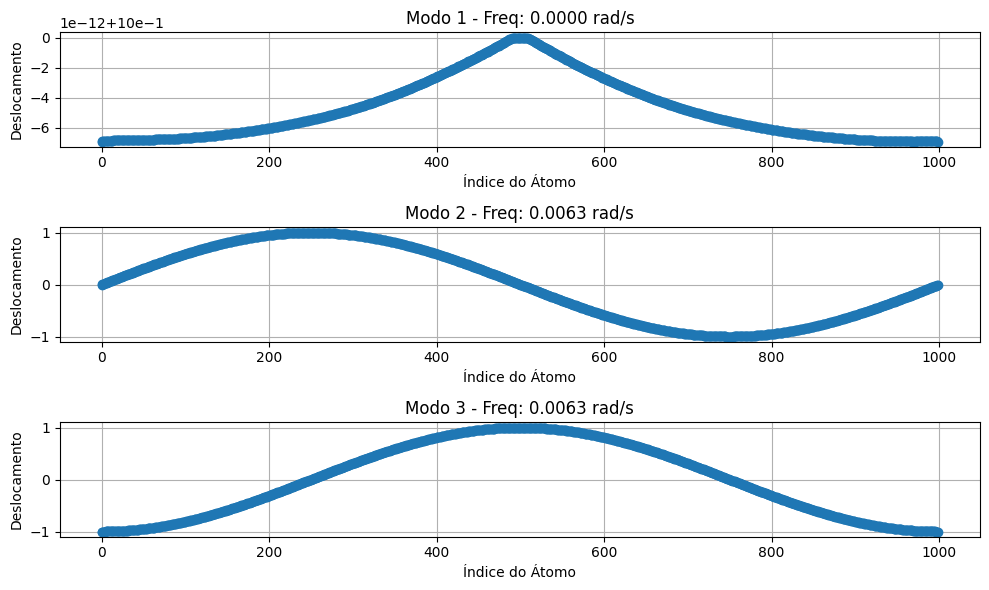

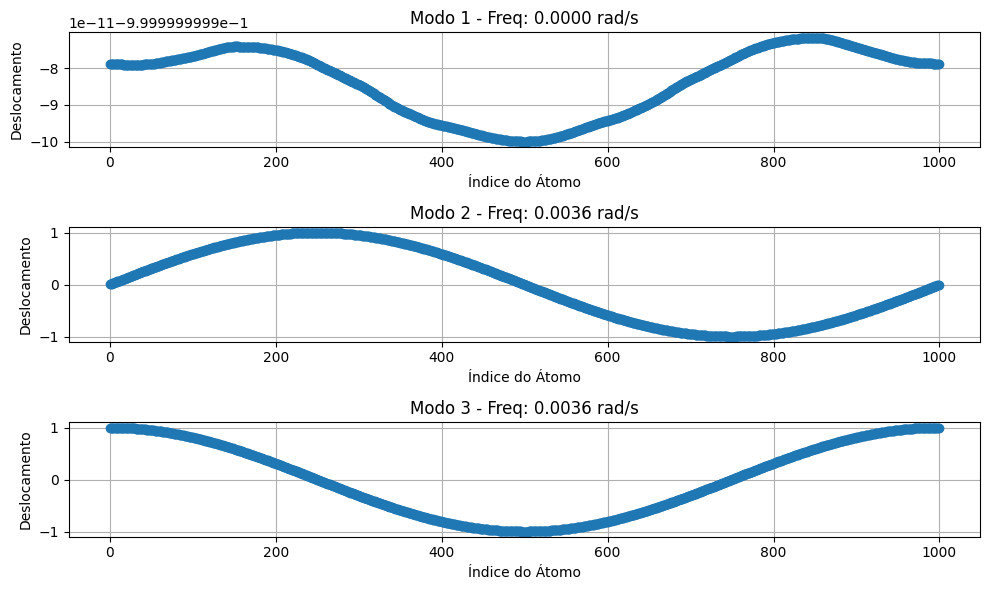

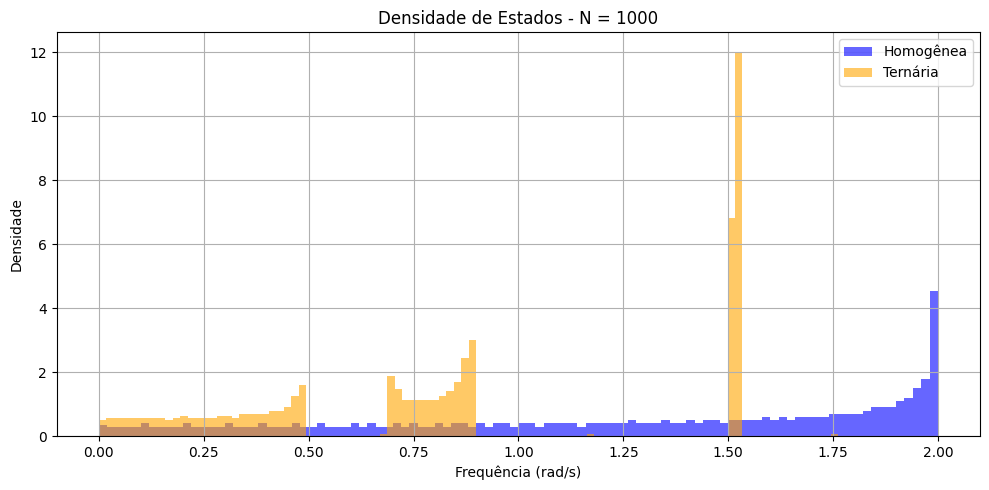

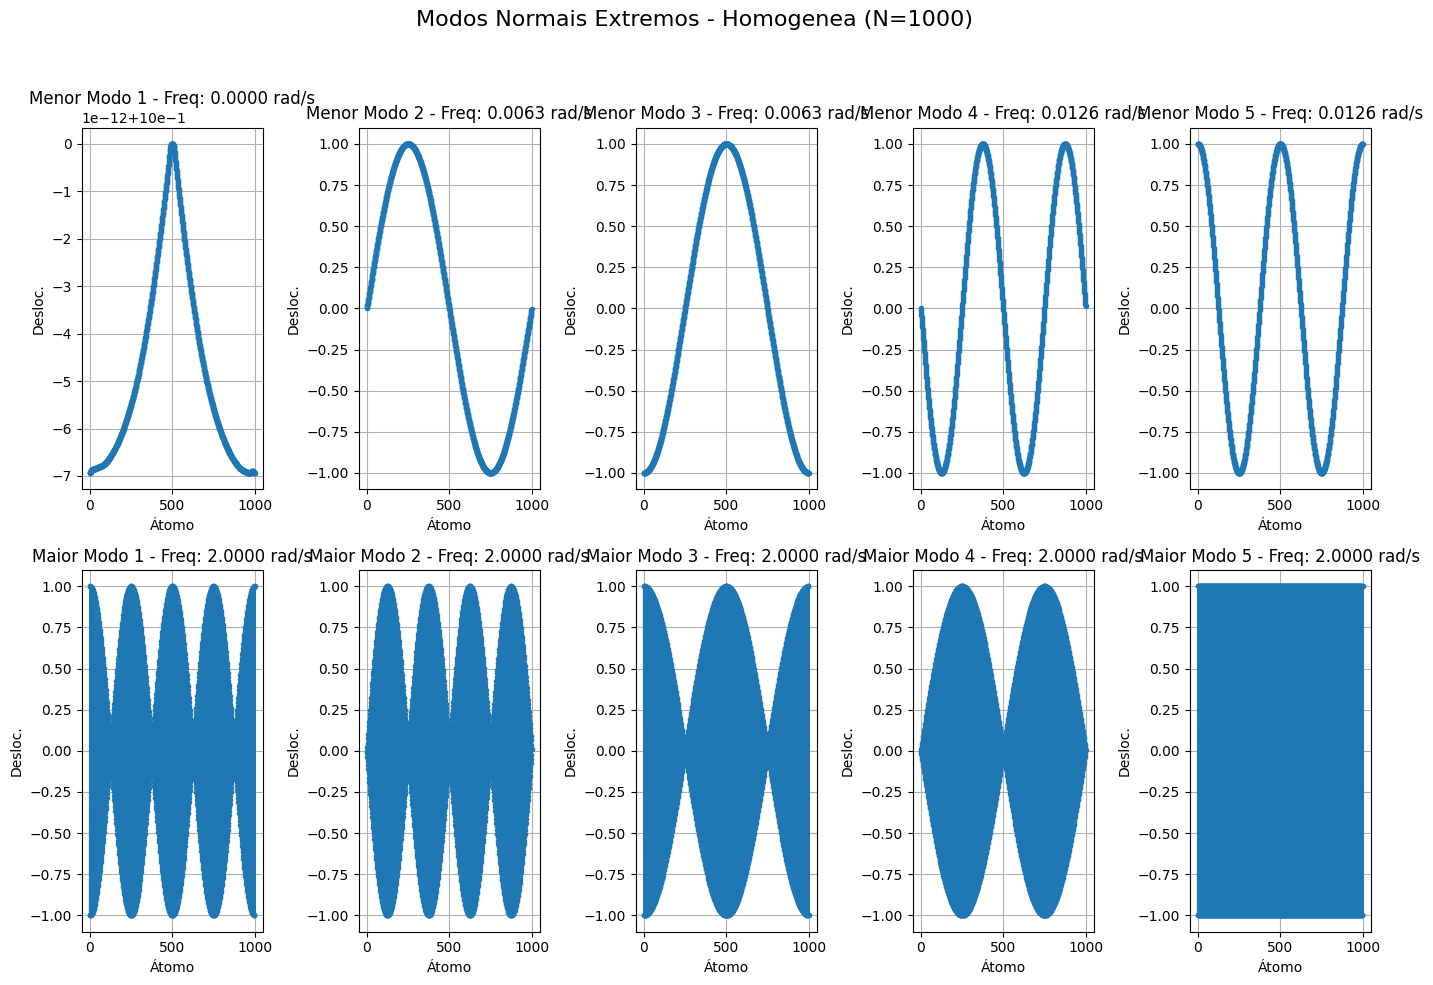

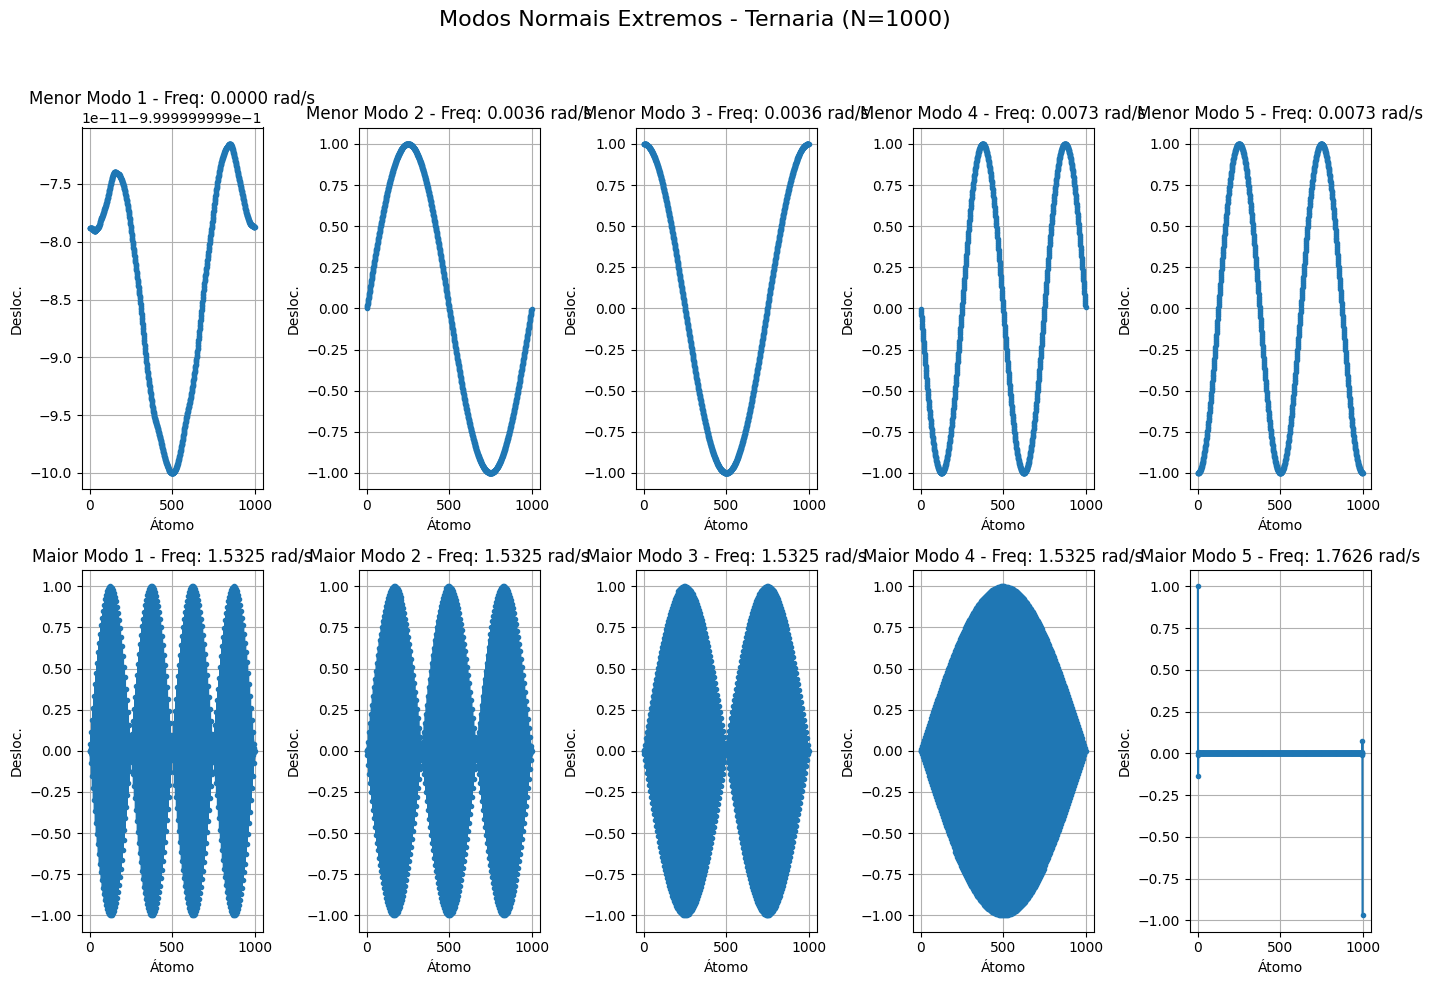


===== N = 10000 =====
Homog√™nea - Primeiras 5 frequ√™ncias: [1.41134000e-08 6.28318520e-04 6.28318521e-04 1.25663698e-03
 1.25663698e-03]
Tern√°ria - Primeiras 5 frequ√™ncias: [0.         0.00036276 0.00036278 0.00072552 0.00072557]


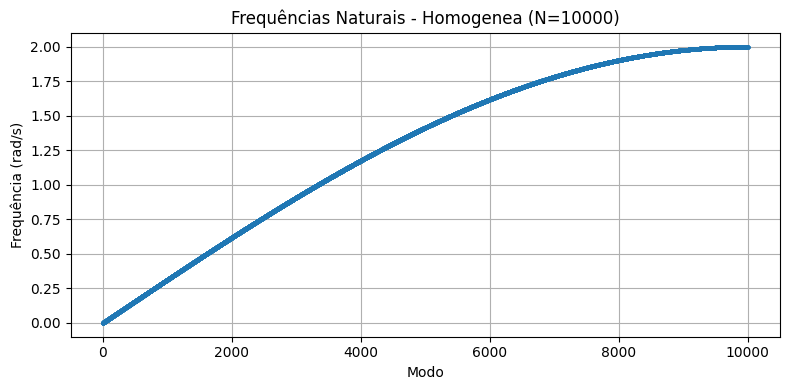

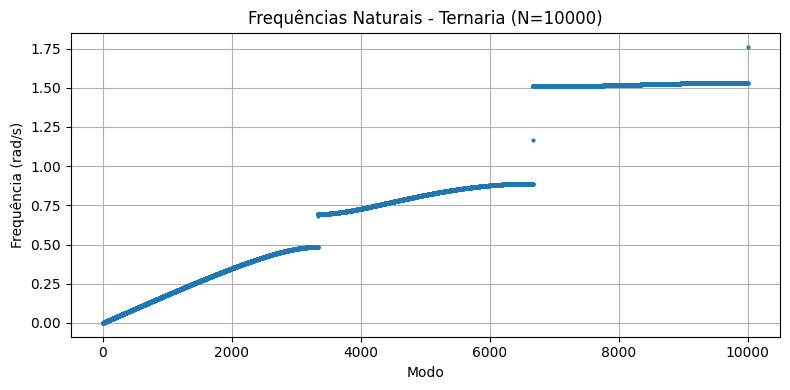

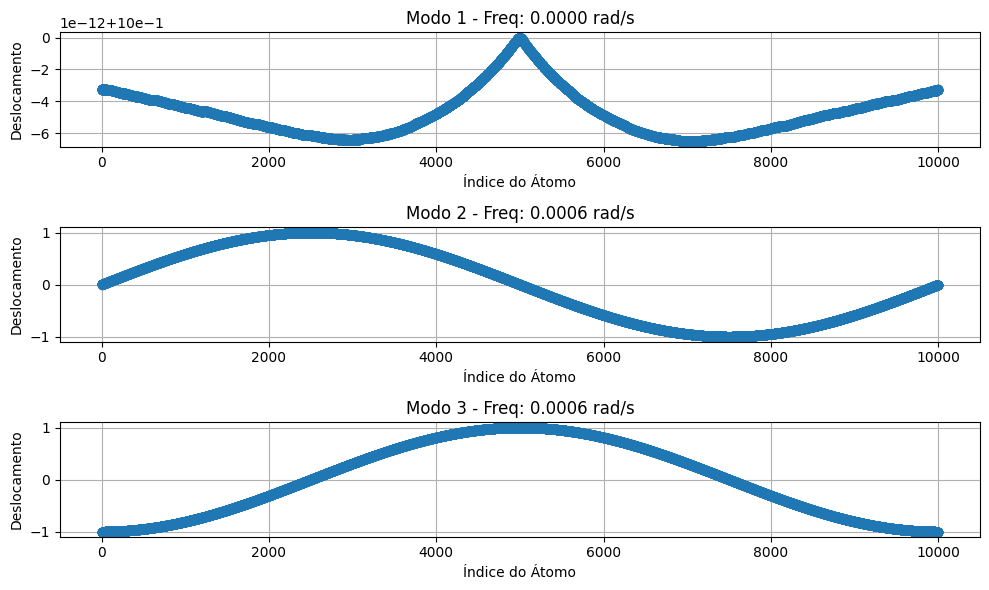

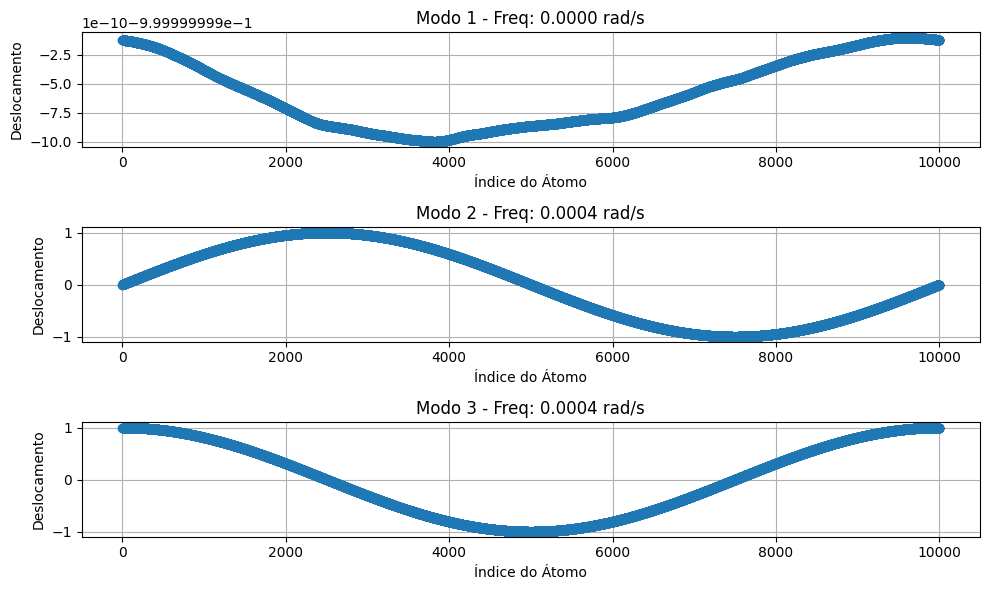

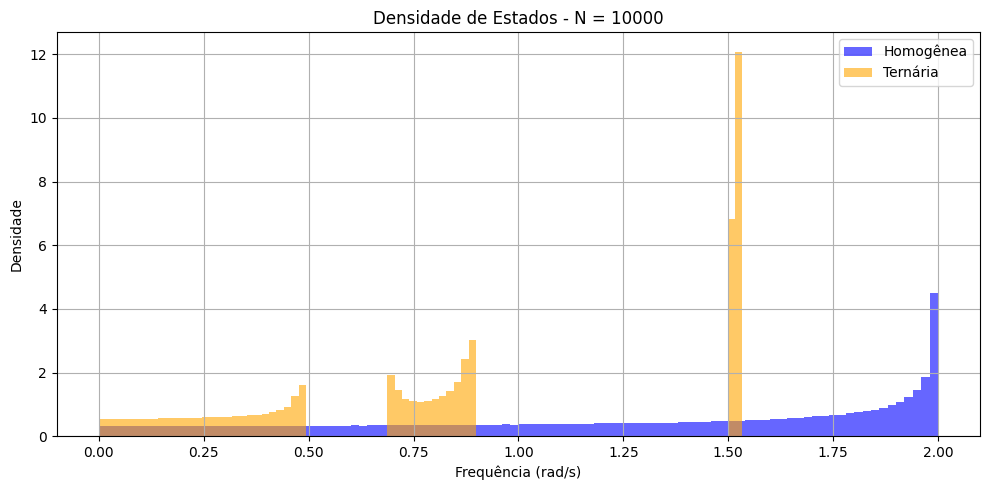

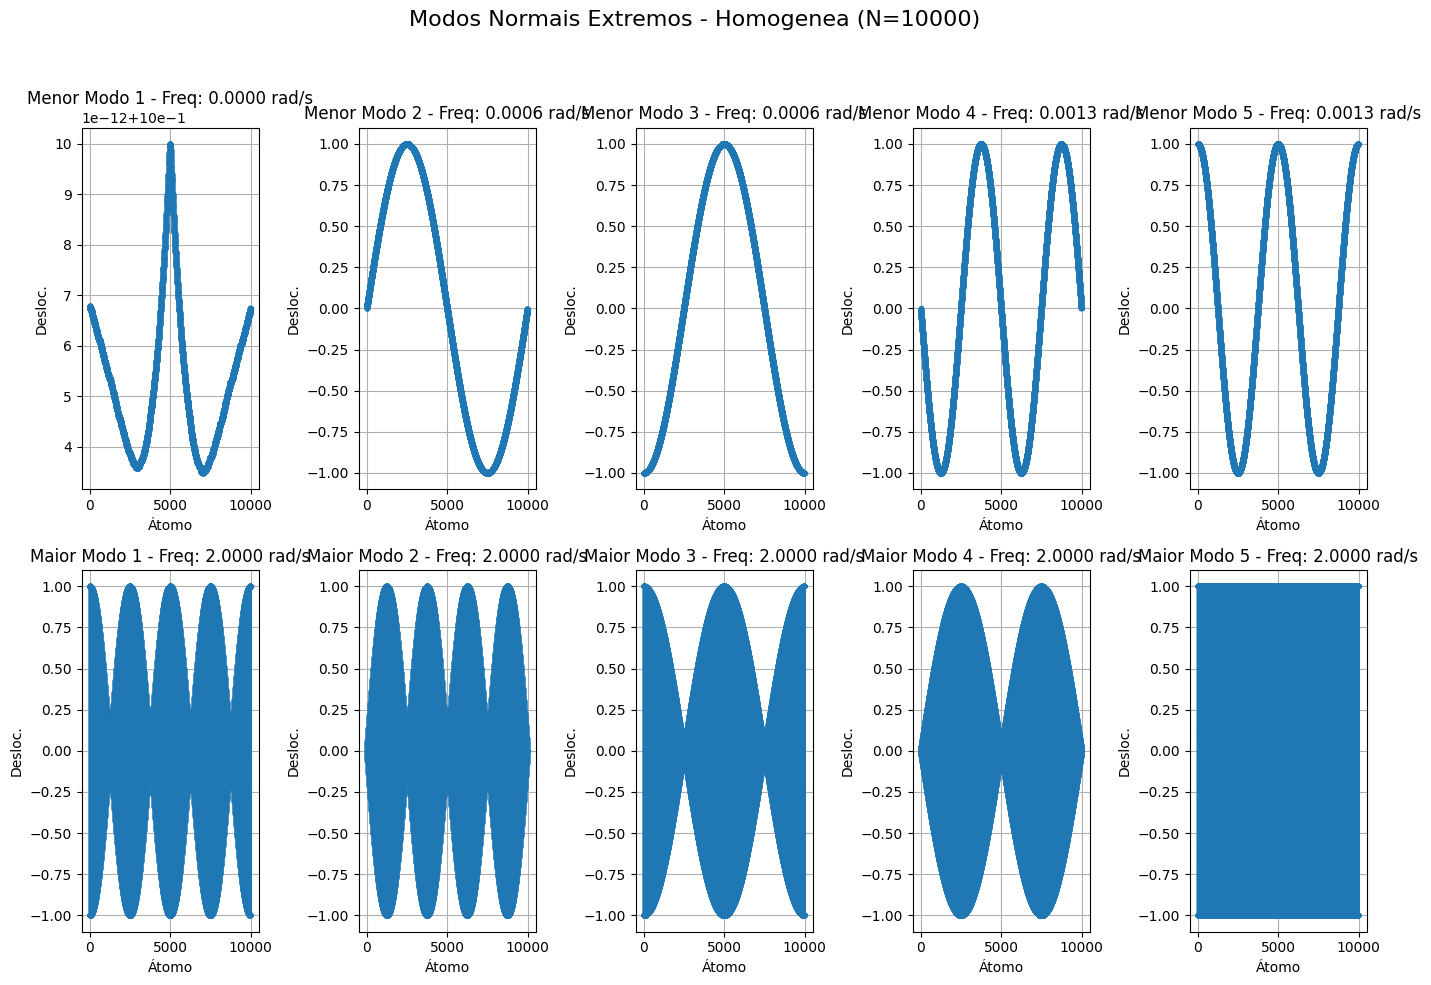

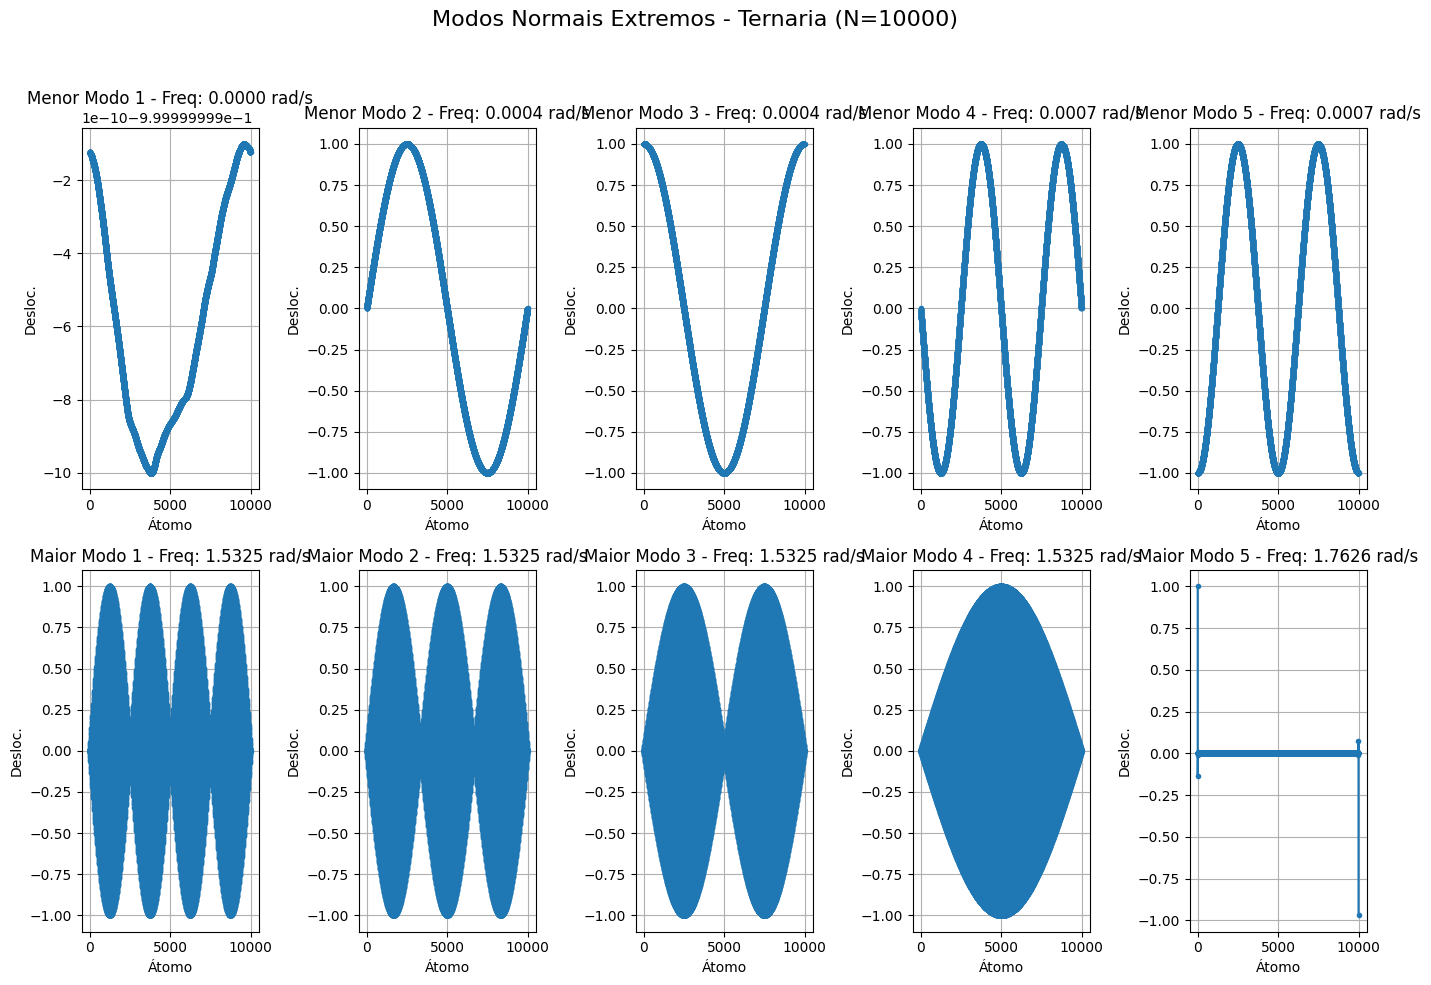

In [11]:
Ns = [100, 1000, 10000]

for N in Ns:
    print(f"\n===== N = {N} =====")

    # Homog√™nea
    sistema_hom = CadeiaAtomica(N=N, tipo='homogenea', k=1.0)
    freq_hom, modos_hom = sistema_hom.calcular_frequencias_e_modos()
    print("Homog√™nea - Primeiras 5 frequ√™ncias:", freq_hom[:5])

    # Tern√°ria
    sistema_tern = CadeiaAtomica(N=N, tipo='ternaria', k=1.0)
    freq_tern, modos_tern = sistema_tern.calcular_frequencias_e_modos()
    print("Tern√°ria - Primeiras 5 frequ√™ncias:", freq_tern[:5])

    # Plota frequ√™ncias
    sistema_hom.plotar_frequencias(freq_hom)
    sistema_tern.plotar_frequencias(freq_tern)

    # Plota os 3 primeiros modos normais
    sistema_hom.plotar_modos_normais(modos_hom, freq_hom)
    sistema_tern.plotar_modos_normais(modos_tern, freq_tern)

    # Densidade de estados
    plotar_densidade_de_estados(freq_hom, freq_tern, N, bins=100)

    # Modos normais extremos (baixa e alta energia)
    plotar_modos_extremos(modos_hom, freq_hom, N, tipo='homogenea')
    plotar_modos_extremos(modos_tern, freq_tern, N, tipo='ternaria')


### Exerc√≠cio 04
![alt text](ex4.png)

## 4. An√°lise e Compara√ß√£o

A seguir, apresentamos uma an√°lise comparativa entre a cadeia **homog√™nea** (todas as massas iguais a \( m \)) e a cadeia **tern√°ria** (massas alternando entre \( m,\ 3m,\ 5m \)) em rela√ß√£o √†s frequ√™ncias naturais de vibra√ß√£o, densidade de estados e padr√µes de deslocamento dos modos normais.

### üìå 4.1 Distribui√ß√£o das Frequ√™ncias (Densidade de Estados)

**Cadeia Homog√™nea:**
- Apresenta uma distribui√ß√£o de frequ√™ncias cont√≠nua e suave.
- A forma da curva de densidade de estados √© t√≠pica de sistemas com simetria translacional uniforme.
- As frequ√™ncias est√£o densamente distribu√≠das dentro de uma √∫nica banda cont√≠nua.

**Cadeia Tern√°ria:**
- A distribui√ß√£o das frequ√™ncias apresenta **lacunas (band gaps)** vis√≠veis entre grupos de frequ√™ncias.
- Essas bandas surgem devido √† altern√¢ncia de massas, que quebra a simetria simples do sistema.
- A densidade de estados √© composta por m√∫ltiplas faixas separadas, o que caracteriza o surgimento de zonas proibidas de vibra√ß√£o.

**Conclus√£o:**  
> A altern√¢ncia de massas na cadeia tern√°ria introduz **band gaps** na densidade de estados ‚Äî algo que **n√£o ocorre** na cadeia homog√™nea. Esse comportamento √© an√°logo √† forma√ß√£o de bandas proibidas em s√≥lidos cristalinos com m√∫ltiplos √°tomos por c√©lula unit√°ria.


### üìå 4.2 Padr√µes de Deslocamento dos Modos Normais

**Modos de Baixa Frequ√™ncia (baixa energia):**
- Em ambas as cadeias, os modos de baixa frequ√™ncia apresentam **movimentos coletivos** e suaves, com muitos √°tomos vibrando em fase.
- Esses modos se assemelham a ondas ac√∫sticas de baixa energia.

**Modos de Alta Frequ√™ncia (alta energia):**
- Na cadeia homog√™nea, os modos de alta frequ√™ncia s√£o cont√≠nuos, com r√°pida oscila√ß√£o dos √°tomos ao longo da cadeia.
- Na cadeia tern√°ria, os modos de alta frequ√™ncia apresentam **localiza√ß√£o espacial**: certos √°tomos vibram com amplitude maior, enquanto outros permanecem quase im√≥veis.

**Localiza√ß√£o dos Modos:**
- A estrutura tern√°ria favorece a **localiza√ß√£o vibracional** em regi√µes espec√≠ficas da cadeia, especialmente nas massas mais leves.
- A heterogeneidade introduzida pelas diferentes massas impede o espalhamento uniforme da energia vibracional.

**Conclus√£o:**  
> A cadeia homog√™nea apresenta modos normais mais distribu√≠dos e cont√≠nuos, enquanto a cadeia tern√°ria exibe **modos localizados**, especialmente nos de alta frequ√™ncia, devido √† diferen√ßa de in√©rcia entre as massas \( m,\ 3m,\ 5m \).

### üìå 4.3 Lacunas de Frequ√™ncia (Band Gaps)

**Cadeia Homog√™nea:**
- N√£o h√° lacunas de frequ√™ncia. As frequ√™ncias cobrem uma faixa cont√≠nua desde zero at√© uma frequ√™ncia m√°xima.

**Cadeia Tern√°ria:**
- Apresenta lacunas de frequ√™ncia vis√≠veis entre bandas de modos vibracionais.
- Essas **band gaps** s√£o resultado direto da estrutura peri√≥dica com m√∫ltiplas massas diferentes, o que cria zonas proibidas de propaga√ß√£o de certos modos.

**Conclus√£o:**  
> A cadeia tern√°ria apresenta **band gaps claramente identific√°veis**, que se tornam mais evidentes √† medida que \( N \) aumenta. Esses fen√¥menos s√£o importantes na modelagem de cristais, isolantes e dispositivos fon√¥nicos.

### ‚úÖ Resumo Comparativo

| Caracter√≠stica                    | Cadeia Homog√™nea              | Cadeia Tern√°ria                      |
|----------------------------------|-------------------------------|--------------------------------------|
| Distribui√ß√£o das Frequ√™ncias     | Cont√≠nua e suave              | Em bandas, com lacunas (band gaps)   |
| Modos de Baixa Frequ√™ncia        | Ondas coletivas suaves        | Ondas suaves com perturba√ß√µes leves  |
| Modos de Alta Frequ√™ncia         | Oscila√ß√µes r√°pidas cont√≠nuas  | Modos **localizados** por in√©rcia    |
| Lacunas de Frequ√™ncia            | N√£o existem                   | Sim, existem lacunas vis√≠veis        |
| Localiza√ß√£o Vibracional          | Pouco ou nenhum               | Presente nos modos de alta energia   |

resposta do moodle:

Introdu√ß√£o

O modelo massa-mola √© uma representa√ß√£o simplificada, por√©m eficaz, das intera√ß√µes at√¥micas em s√≥lidos, onde massas simulam √°tomos e molas representam for√ßas de liga√ß√£o entre eles. Esse modelo permite estudar a propaga√ß√£o de vibra√ß√µes e ondas mec√¢nicas em sistemas discretos.

Cadeias homog√™neas, compostas por massas e molas id√™nticas, refletem materiais com estrutura uniforme. J√° cadeias bin√°rias, com altern√¢ncia de massas e/ou molas, simulam materiais compostos e revelam fen√¥menos como bandas proibidas na propaga√ß√£o de ondas.

As condi√ß√µes de contorno livres, onde as extremidades da cadeia n√£o est√£o fixas, s√£o importantes para representar sistemas f√≠sicos reais, como superf√≠cies de cristais ou nanoestruturas. Elas influenciam diretamente os modos normais de vibra√ß√£o e permitem uma an√°lise mais realista do comportamento din√¢mico do sistema.